# Portuguese Financial Institution - Term Deposit Project 

In [1]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset into python
df = pd.read_excel('TermDeposit.xlsx')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data Pre-Processing

In [3]:
# Getting the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


It is understood that there are no missing values

In [4]:
# For the numerical columns, understanding the mean, min, max and other values using describe function
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Look for duplicate values for all features

In [5]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
# To understand the if the dataset has any duplicate values

df[df['age'].duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
13,58,technician,married,unknown,no,71,yes,no,unknown,5,may,71,1,-1,0,unknown,no
17,57,blue-collar,married,primary,no,52,yes,no,unknown,5,may,38,1,-1,0,unknown,no
19,33,services,married,secondary,no,0,yes,no,unknown,5,may,54,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
# To find the duplicate record founds, where all records are repeating

duplicates = df.duplicated(keep=False)

# Print duplicate records
if duplicates.any():
    print("Duplicate records where all features are repeating:")
    print(df[duplicates])
else:
    print("No duplicate records found where all features are repeating.")

No duplicate records found where all features are repeating.


In [9]:
# Finding values counts for all the feature to find the data imbalance in features

for col in df.columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print()

Value counts for age:
age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64

Value counts for job:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Value counts for marital:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

Value counts for education:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Value counts for default:
default
no     44396
yes      815
Name: count, dtype: int64

Value counts for balance:
balance
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1


Observations Found: Unknown records found in Jobs, Education. Default has data imbalance,

Understanding the % of unknowns present in job as feature

In [10]:
(len(df[df['job']=='unknown']) * 100)/len(df['job'])

# Just 0.63% of the jobs are currently marked 'Unknown'

0.6370131162770122

Understanding the % of unknowns present in Education as feature

In [11]:
(len(df[df['education']=='unknown']) * 100)/len(df['education'])

# Just 4.1% of the jobs are currently marked 'Unknown'

4.1074074893278185

In [12]:
df_job_unknown=df[df['job']=='unknown']

In [13]:
df_job_unknown

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
216,47,unknown,married,unknown,no,28,no,no,unknown,5,may,338,2,-1,0,unknown,no
354,59,unknown,divorced,unknown,no,27,no,no,unknown,5,may,347,3,-1,0,unknown,no
876,37,unknown,single,unknown,no,414,yes,no,unknown,7,may,131,1,-1,0,unknown,no
1072,29,unknown,single,primary,no,50,yes,no,unknown,7,may,50,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44714,45,unknown,married,tertiary,no,406,no,no,cellular,7,sep,314,1,-1,0,unknown,yes
44742,64,unknown,married,unknown,no,2799,no,no,telephone,9,sep,378,4,-1,0,unknown,no
44970,28,unknown,single,unknown,no,326,no,no,cellular,11,oct,450,1,231,1,success,yes
45141,77,unknown,married,unknown,no,397,no,no,telephone,8,nov,207,1,185,3,success,no


In [14]:
# % of users opted for term-insurance when job is unknown

print((len(df_job_unknown[df_job_unknown['y']=='yes']) * 100)/len(df_job_unknown['y']))

# overall % of users opted of term-insurance
print((len(df[df['y']=='yes']) * 100)/len(df['y']))

# overall - There is not much difference with users opted for term-insurance when the job is unknown

11.805555555555555
11.698480458295547


In [15]:
df_education_unknown=df[df['education']=='unknown']

In [16]:
# % of users opted for term-insurance when education is unknown

print((len(df_education_unknown[df_education_unknown['y']=='yes']) * 100)/len(df_education_unknown['y']))

# overall % of users opted of term-insurance
print((len(df[df['y']=='yes']) * 100)/len(df['y']))

# overall - There is not much difference with users opted for term-insurance when the education is unknown

13.5702746365105
11.698480458295547


Taking a copy of DF1, for further removal of rows and imputation

In [17]:
df1=df.copy()

In [18]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [19]:
df1[(df1['job'] == 'unknown') & (df1['education'] == 'unknown') & (df1['poutcome'] == 'unknown')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
216,47,unknown,married,unknown,no,28,no,no,unknown,5,may,338,2,-1,0,unknown,no
354,59,unknown,divorced,unknown,no,27,no,no,unknown,5,may,347,3,-1,0,unknown,no
876,37,unknown,single,unknown,no,414,yes,no,unknown,7,may,131,1,-1,0,unknown,no
2046,57,unknown,married,unknown,no,106,no,no,unknown,12,may,836,4,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42394,44,unknown,single,unknown,no,18881,no,no,cellular,2,dec,187,2,-1,0,unknown,no
42616,65,unknown,married,unknown,no,300,no,no,cellular,12,jan,105,1,-1,0,unknown,no
43089,27,unknown,single,unknown,no,326,no,no,cellular,22,feb,326,1,-1,0,unknown,yes
43653,77,unknown,married,unknown,no,397,no,no,telephone,7,may,300,3,-1,0,unknown,yes


From the above table, these are rows where Job, Education and POutcome is Unknown and constitues ~0.25% of the overall dataset. So its safe to delete these rows from the overall dataset for a better model result

In [20]:
unknown_rows = df1[(df1['job'] == 'unknown') & (df1['education'] == 'unknown') & (df1['poutcome'] == 'unknown')]

In [21]:
df1 = df1.drop(unknown_rows.index)

In [22]:
df1

# Deleted the corresponding rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [23]:
df1_poutcome_unknown=df1[df1['poutcome']=='unknown']

In [24]:
df1_poutcome_unknown

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [25]:
# % of users opted for term-insurance when poutcome is unknown

print((len(df1_poutcome_unknown[df1_poutcome_unknown['y']=='yes']) * 100)/len(df1_poutcome_unknown['y']))

# overall % of users opted of term-insurance
print((len(df1[df1['y']=='yes']) * 100)/len(df1['y']))

# overall - There is not much difference with users opted for term-insurance when the POutcome is unknown

9.157777596829792
11.70196252356137


In [26]:
df1_job_unknown=df1[df1['job']=='unknown']
df1_education_unknown=df1[df1['education']=='unknown']

In [27]:
df1_education_unknown

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
13,58,technician,married,unknown,no,71,yes,no,unknown,5,may,71,1,-1,0,unknown,no
16,45,admin.,single,unknown,no,13,yes,no,unknown,5,may,98,1,-1,0,unknown,no
42,60,blue-collar,married,unknown,no,104,yes,no,unknown,5,may,22,1,-1,0,unknown,no
44,58,retired,married,unknown,no,96,yes,no,unknown,5,may,616,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45129,46,technician,married,unknown,no,3308,no,no,cellular,27,oct,171,1,91,2,success,yes
45141,77,unknown,married,unknown,no,397,no,no,telephone,8,nov,207,1,185,3,success,no
45150,65,management,married,unknown,no,2352,no,no,cellular,8,nov,354,3,188,13,success,no
45158,34,student,single,unknown,no,2321,no,no,cellular,9,nov,600,2,99,5,failure,no


In [28]:
# % of users opted for term-insurance when job is unknown

print((len(df1_job_unknown[df1_job_unknown['y']=='yes']) * 100)/len(df1_job_unknown['y']))

# overall % of users opted of term-insurance
print((len(df1[df1['y']=='yes']) * 100)/len(df1['y']))

# overall - There is not much difference with users opted for term-insurance when the job is unknown

12.790697674418604
11.70196252356137


In [29]:
# % of users opted for term-insurance when education is unknown

print((len(df1_education_unknown[df1_education_unknown['y']=='yes']) * 100)/len(df1_education_unknown['y']))

# overall % of users opted of term-insurance
print((len(df1[df1['y']=='yes']) * 100)/len(df1['y']))

# overall - There is not much difference with users opted for term-insurance when the education is unknown

13.785180930499713
11.70196252356137


From the above statement, its understood that Unknown values across Job, Education and POutcome has more or less no difference or variance with respect to known or unknown values.

In [30]:
# Understanding the % of overall Job and Education with values as Unknown with respect to overall values

print((len(df1[df1['job']=='unknown']) * 100)/len(df1))
print((len(df1[df1['education']=='unknown']) * 100)/len(df1))

0.38141700853753185
3.8607384410688548


Since the features Job and Education has 0.4 and 3.9 percentage respectively and their unknown values have little to no different with respect to the target variable 'Y' (Term-Insurance), it is safe to impute the unknown values with 'Mode' as its a categorical feature

In [31]:
df1['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           172
Name: count, dtype: int64

In [32]:
mode_value = 'blue-collar'
df1['job'] = df1['job'].replace('unknown', mode_value)

In [33]:
df1['job'].value_counts()

job
blue-collar      9904
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64

In [34]:
df1['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1741
Name: count, dtype: int64

In [35]:
mode_value_edu = 'secondary'
df1['education'] = df1['education'].replace('unknown', mode_value_edu)

df1['education'].value_counts()

Understanding the Default feature

In [36]:
df1['default'].value_counts()

default
no     44281
yes      814
Name: count, dtype: int64

In [37]:
df1_default_yes=df1[df1['default']=='yes']

In [38]:
# % of users opted for term-insurance when default is unknown

print((len(df1_default_yes[df1_default_yes['y']=='yes']) * 100)/len(df1_default_yes['y']))

# overall % of users opted of term-insurance
print((len(df1[df1['y']=='yes']) * 100)/len(df1['y']))

# overall - There is not significant difference with users opted for term-insurance when the default is yes

6.388206388206388
11.70196252356137


Since there is no significant difference in default with respect to the target value of term-insurance - Default as feature can be dropped. For this project, we will be dropping default out on later stages once more feature engineering is done

Understanding the feature balance

In [39]:
df1['balance'].value_counts()

balance
 0        3503
 1         194
 2         156
 4         139
 3         133
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: count, Length: 7155, dtype: int64

<Axes: ylabel='balance'>

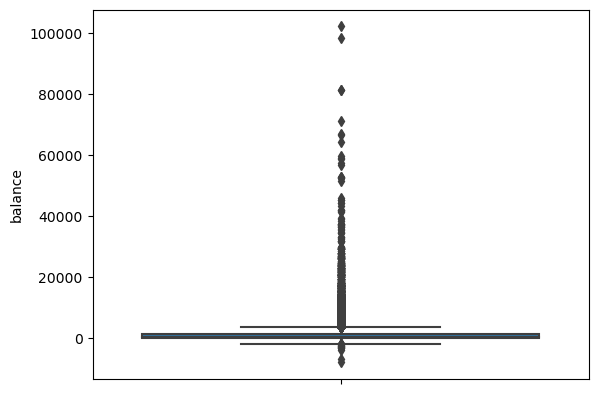

In [40]:
sns.boxplot(y='balance',data=df1)

In [41]:
# To figure out the outliers values by using IQR Method

Q1 = df1['balance'].quantile(0.25)
Q3 = df1['balance'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

print(f"Q1: {Q1} | Q3: {Q3} | IQR: {IQR} | LL: {LL} | UL: {UL}")

Q1: 72.0 | Q3: 1424.0 | IQR: 1352.0 | LL: -1956.0 | UL: 3452.0


In [42]:
outlier_count = df1[(df1['balance'] > 3452.0) | (df1['balance'] < -1956.0)].shape[0]

outlier_perc = (outlier_count * 100)/df1.shape[0]

print(f"# of Outliers: {outlier_count} | % of Outliers: {outlier_perc}")

# of Outliers: 4727 | % of Outliers: 10.482315112540192


Balance has more than 10% of the values as outliers

 Segmenting features

Feature Balance is planned to be segrmented based on Quantiles

Also taking a copy of df1 to df2

In [43]:
df2=df1.copy()

In [44]:
df2['Balance_segment'] = pd.qcut(df2['balance'], q=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 

In [45]:
df2_balseg_0=df2[df2['Balance_segment']==0]

In [46]:
df2_balseg_0['balance'].describe().iloc[3]

-8019.0

In [47]:
for i in range(0,10):
    bal_valuecounts=(df2[df2['Balance_segment']==i])
    balance_min=bal_valuecounts['balance'].describe().iloc[3]
    print(f"For segment {i}, the value starts from: {balance_min}")

For segment 0, the value starts from: -8019.0
For segment 1, the value starts from: 1.0
For segment 2, the value starts from: 23.0
For segment 3, the value starts from: 131.0
For segment 4, the value starts from: 272.0
For segment 5, the value starts from: 449.0
For segment 6, the value starts from: 701.0
For segment 7, the value starts from: 1124.0
For segment 8, the value starts from: 1858.0
For segment 9, the value starts from: 3573.0


Balance is split into 10 segments on feature named: Balance_segment, as per Quantile, and currently part of df2 dataframe

In [48]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Observing Feature 'day'

In [49]:
df1['day'].value_counts()

day
20    2741
18    2302
21    2023
17    1937
6     1921
5     1897
14    1845
8     1842
28    1825
7     1812
19    1751
29    1740
15    1702
12    1599
13    1584
30    1563
9     1558
11    1471
4     1437
16    1413
2     1290
27    1121
3     1078
26    1032
23     938
22     902
25     838
31     641
10     524
24     447
1      321
Name: count, dtype: int64

In [50]:
bins = [0, 8, 16, 24, 32]  # Bin boundaries for segmentation
labels = ['Week1', 'Week2', 'Week3', 'Week4']  # Labels for segments   

# Create the 'weeks' feature based on the segmentation
df1['weeks'] = pd.cut(df1['day'], bins=bins, labels=labels, right=False)

In [51]:
Week_1=df1[df1['weeks']=='Week1']

In [52]:
Week_1['day'].describe()

count    9756.000000
mean        4.671792
std         1.771495
min         1.000000
25%         3.000000
50%         5.000000
75%         6.000000
max         7.000000
Name: day, dtype: float64

In [53]:
Week_2=df1[df1['weeks']=='Week2']

In [54]:
Week_2['day'].describe()

count    12125.000000
mean        11.655175
std          2.401152
min          8.000000
25%          9.000000
50%         12.000000
75%         14.000000
max         15.000000
Name: day, dtype: float64

In [55]:
Week_3=df1[df1['weeks']=='Week3']

In [56]:
Week_3['day'].describe()

count    14007.000000
mean        19.202042
std          2.002323
min         16.000000
25%         18.000000
50%         19.000000
75%         21.000000
max         23.000000
Name: day, dtype: float64

In [57]:
Week_4=df1[df1['weeks']=='Week4']

In [58]:
Week_4['day'].describe()

count    9207.000000
mean       27.924188
std         1.911895
min        24.000000
25%        26.000000
50%        28.000000
75%        29.000000
max        31.000000
Name: day, dtype: float64

Replicating the same for df2 (The reason for doing it because DF2 is planned to be a seperate Dataframe to have its corresponding models performed)

In [59]:
bins = [0, 8, 16, 24, 32]  # Bin boundaries for segmentation
labels = ['Week1', 'Week2', 'Week3', 'Week4']  # Labels for segments   

# Create the 'weeks' feature based on the segmentation
df2['weeks'] = pd.cut(df2['day'], bins=bins, labels=labels, right=False)

Understanding feature 'Duration'

In [60]:
df1['duration'].value_counts()

duration
124     188
90      184
89      177
114     175
122     174
       ... 
3422      1
1834      1
1597      1
1456      1
1556      1
Name: count, Length: 1573, dtype: int64

In [61]:
df1.query('duration > 100')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,weeks
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Week1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Week1
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,Week1
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,Week1
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,Week1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,Week3
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,Week3
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,Week3
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,Week3


In [62]:
one_min_dur=len(df1.query('duration < 60'))
one_two_min_dur=len(df1.query('duration > 60 and duration < 120'))
two_three_min_dur=len(df1.query('duration > 120 and duration < 180'))
three_four_min_dur=len(df1.query('duration > 180 and duration < 240'))
four_five_min_dur=len(df1.query('duration > 240 and duration < 300'))
five_six_min_dur=len(df1.query('duration > 300 and duration < 360'))
six_seven_dur=len(df1.query('duration > 360 and duration < 420'))
seven_eight_dur=len(df1.query('duration > 420 and duration < 480'))
eight_nine_dur=len(df1.query('duration > 480 and duration < 540'))
nine_ten_dur=len(df1.query('duration > 540 and duration < 600'))
greater_ten_dur=len(df1.query('duration > 600'))
print(f'Duration less than 1 minutes: {one_min_dur}')
print(f'Duration between 1 and 2 minutes: {one_two_min_dur}')
print(f'Duration between 2 and 3 minutes: {two_three_min_dur}')
print(f'Duration between 3 and 4 minutes: {three_four_min_dur}')
print(f'Duration between 4 and 5 minutes: {four_five_min_dur}')
print(f'Duration between 5 and 6 minutes: {five_six_min_dur}')
print(f'Duration between 6 and 7 minutes: {six_seven_dur}')
print(f'Duration between 7 and 8 minutes: {seven_eight_dur}')
print(f'Duration between 8 and 9 minutes: {eight_nine_dur}')
print(f'Duration between 9and 10 minutes: {nine_ten_dur}')
print(f'Duration greater than 10 minutes: {greater_ten_dur}')

Duration less than 1 minutes: 4637
Duration between 1 and 2 minutes: 9119
Duration between 2 and 3 minutes: 8478
Duration between 3 and 4 minutes: 5929
Duration between 4 and 5 minutes: 4179
Duration between 5 and 6 minutes: 2857
Duration between 6 and 7 minutes: 2072
Duration between 7 and 8 minutes: 1454
Duration between 8 and 9 minutes: 1101
Duration between 9and 10 minutes: 843
Duration greater than 10 minutes: 3781


From the above its quite evident that we can segment the duration into 3 values (0,1 and 2), with 0= <2 minutes, 1 : between 2 and 4 minutes, and value 2: greater than 4 minutes due to the split between the data

In [63]:
bins = [0, 121, 241, 10000]  # Bin boundaries for segmentation
labels = ['0', '1', '2']  # Labels for segments   

df1['duration_segment'] = pd.cut(df1['duration'], bins=bins, labels=labels, right=False)

In [64]:
df1['duration'].describe()

count    45095.000000
mean       258.227764
std        257.638824
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [65]:
df1['duration_segment'].value_counts()

duration_segment
2    16473
1    14624
0    13998
Name: count, dtype: int64

Replicating the same for DF2

In [66]:
bins = [0, 121, 241, 10000]  # Bin boundaries for segmentation
labels = ['0', '1', '2']  # Labels for segments   

df2['duration_segment'] = pd.cut(df2['duration'], bins=bins, labels=labels, right=False)

In [67]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Balance_segment,weeks,duration_segment
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,8,Week1,2
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2,Week1,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,Week1,0
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,7,Week1,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,3,Week1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,6,Week3,2
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,7,Week3,2
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,9,Week3,2
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,5,Week3,2


Understanding Feature : Contact

In [68]:
df1['contact'].value_counts()

contact
cellular     29246
unknown      12966
telephone     2883
Name: count, dtype: int64

In [69]:
contact_tele=df1['contact']=='telephone'
contact_cellular=df1['contact']=='cellular'
contact_unknown=df1['contact']=='unknown'

In [70]:
print((len(df1[df1['y']=='yes']) * 100)/len(df['y']))

# 11.67% of overall users opted for term insurance

11.671938245117339


In [71]:
print(df1[contact_tele]['y'].value_counts())
print(df1[contact_cellular]['y'].value_counts())
print(df1[contact_unknown]['y'].value_counts())

y
no     2497
yes     386
Name: count, dtype: int64
y
no     24884
yes     4362
Name: count, dtype: int64
y
no     12437
yes      529
Name: count, dtype: int64


In [72]:
tele_percentage=(386*100)/(len(df1))
cel_percentage=(4362*100)/(len(df1))
unknown_percentage=(529*100)/(len(df1))

In [73]:
tele_percentage

0.8559707284621355

In [74]:
cel_percentage

9.672912739771593

In [75]:
unknown_percentage

1.1730790553276416

It's evident that conversion rate of celllar is much higher. Therefore, we will maintain the feature as it is.

Understanding the feature: Campaign

In [76]:
df1['campaign'].value_counts()

campaign
1     17500
2     12485
3      5505
4      3512
5      1757
6      1285
7       734
8       537
9       325
10      265
11      200
12      155
13      132
14       93
15       83
16       78
17       69
18       50
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        3
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: count, dtype: int64

Since the value 1 and 2 are higher, we are splitting the campaign between 3 different segment.
0 for 1 contact made, 1 for 2 contact made, 2 for more than 2 contacts made

In [77]:
def map_feature(x):
    if x == 1:
        return 0
    elif x == 2:
        return 1
    elif x > 2:
        return 2
    else:
        return None

# Create the new feature 'campaign_segment' using the custom function
df1['campaign_segment'] = df1['campaign'].apply(map_feature)

In [78]:
df1['campaign_segment'].value_counts()

campaign_segment
0    17500
2    15110
1    12485
Name: count, dtype: int64

Replicating  the same for DF2

In [79]:
df2['campaign_segment'] = df2['campaign'].apply(map_feature)

In [80]:
df2['campaign_segment'].value_counts()

campaign_segment
0    17500
2    15110
1    12485
Name: count, dtype: int64

Understanding pdays, previous features

In [81]:
pdays_1=df1[df1['pdays']==-1]

In [82]:
pdays_1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,weeks,duration_segment,campaign_segment
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Week1,2,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Week1,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Week1,0,0
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Week1,0,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,Week1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes,Week3,2,0
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes,Week3,2,1
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,Week3,2,2
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,Week3,2,1


In [83]:
df_pdays=df1.copy()

In [84]:
pdays_index=df_pdays[df_pdays['pdays']==-1].index

In [85]:
df_pdays.drop(index=pdays_index, axis=1, inplace=True)

In [86]:
df_pdays['pdays'].value_counts()

pdays
182    167
92     147
183    126
91     126
181    117
      ... 
425      1
578      1
674      1
416      1
530      1
Name: count, Length: 558, dtype: int64

In [87]:
df_pdays['pdays_segment'] = pd.qcut(df_pdays['pdays'], q=5, labels=[0, 1, 2, 3, 4]) 

In [88]:
df_pdays['pdays_segment'].value_counts()

pdays_segment
3    1704
0    1661
1    1654
2    1647
4    1591
Name: count, dtype: int64

In [89]:
df_pdays_0=df_pdays[df_pdays['pdays_segment']==0]
df_pdays_1=df_pdays[df_pdays['pdays_segment']==1]
df_pdays_2=df_pdays[df_pdays['pdays_segment']==2]
df_pdays_3=df_pdays[df_pdays['pdays_segment']==3]
df_pdays_4=df_pdays[df_pdays['pdays_segment']==4]

In [90]:
df_pdays_0['pdays'].describe()

count    1661.000000
mean       79.820590
std        28.809454
min         1.000000
25%        79.000000
50%        91.000000
75%        96.000000
max       108.000000
Name: pdays, dtype: float64

In [91]:
df_pdays_1['pdays'].describe()

count    1654.000000
mean      153.446796
std        23.257454
min       109.000000
25%       133.000000
50%       160.000000
75%       174.000000
max       181.000000
Name: pdays, dtype: float64

In [92]:
df_pdays_2['pdays'].describe()

count    1647.000000
mean      205.820886
std        25.514799
min       182.000000
25%       185.000000
50%       195.000000
75%       227.000000
max       258.000000
Name: pdays, dtype: float64

In [93]:
df_pdays_3['pdays'].describe()

count    1704.000000
mean      302.372653
std        27.860954
min       259.000000
25%       274.000000
50%       301.000000
75%       329.000000
max       343.000000
Name: pdays, dtype: float64

In [94]:
df_pdays_4['pdays'].describe()

count    1591.000000
mean      385.747957
std        78.430131
min       344.000000
25%       352.000000
50%       363.000000
75%       370.000000
max       871.000000
Name: pdays, dtype: float64

With the help of the above findings on min and max for all the information apart from -1, using the main dataframe to segment pdays into 5 segments as per quantiles

In [95]:
bins = [-1, 0, 109, 182, 259, 344, 871]  # Bin boundaries for segmentation
labels = [0,1,2,3,4,5]  # Labels for segments   

# Create the 'weeks' feature based on the segmentation
df1['pdays_segment'] = pd.cut(df1['pdays'], bins=bins, labels=labels, right=False)

In [96]:
df1['pdays_segment'].value_counts()

pdays_segment
0    36838
4     1704
1     1661
2     1654
3     1647
5     1590
Name: count, dtype: int64

Replicating for DF2

In [97]:
bins = [-1, 0, 109, 182, 259, 344, 871]  # Bin boundaries for segmentation
labels = [0,1,2,3,4,5]  # Labels for segments   

# Create the 'weeks' feature based on the segmentation
df2['pdays_segment'] = pd.cut(df2['pdays'], bins=bins, labels=labels, right=False)

Understanding Previous Feature

In [98]:
df1['previous'].value_counts()

previous
0      36838
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64

In [99]:
previous_0=df1[df1['previous']==0]

In [100]:
prevous_0_index=previous_0[previous_0['previous']==0].index

In [101]:
df_previous=df1.copy()

In [102]:
df_previous

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,weeks,duration_segment,campaign_segment,pdays_segment
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,Week1,2,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,Week1,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,Week1,0,0,0
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,Week1,0,0,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,...,139,1,-1,0,unknown,no,Week1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,977,3,-1,0,unknown,yes,Week3,2,2,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,456,2,-1,0,unknown,yes,Week3,2,1,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,1127,5,184,3,success,yes,Week3,2,2,3
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,508,4,-1,0,unknown,no,Week3,2,2,0


In [103]:
df_previous.drop(index=prevous_0_index, axis=1, inplace=True)

In [104]:
df_previous['previous'].value_counts()

previous
1      2772
2      2106
3      1142
4       714
5       459
6       277
7       205
8       129
9        92
10       67
11       65
12       44
13       38
15       20
14       19
17       15
16       13
19       11
20        8
23        8
18        6
22        6
24        5
27        5
29        4
25        4
21        4
30        3
38        2
37        2
26        2
28        2
51        1
275       1
58        1
32        1
40        1
55        1
35        1
41        1
Name: count, dtype: int64

From the above values, we can segment number of contacts performed into 4 segments: 1 call as 1, 2 calls as 2, 3 to 4 calls as 3, >4 calls as 4

In [105]:
bins = [0, 1, 2, 3, 5, 1000]  # Bin boundaries for segmentation
labels = [0,1,2,3,4]  # Labels for segments   

# Create the 'weeks' feature based on the segmentation
df1['previous_segment'] = pd.cut(df1['previous'], bins=bins, labels=labels, right=False)

In [106]:
df1[df1['previous_segment']==4]

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,weeks,duration_segment,campaign_segment,pdays_segment,previous_segment
24136,34,management,married,tertiary,no,1770,yes,no,unknown,6,...,1,101,11,other,no,Week1,0,0,1,4
24295,35,technician,divorced,tertiary,no,1718,yes,yes,cellular,17,...,1,167,16,other,no,Week3,0,0,2,4
24299,50,management,married,secondary,no,633,no,yes,telephone,17,...,1,111,6,failure,no,Week3,2,0,2,4
24300,42,technician,single,tertiary,no,35,yes,yes,cellular,17,...,1,115,5,other,no,Week3,0,0,2,4
24331,36,management,married,tertiary,no,5057,yes,no,cellular,17,...,1,166,10,failure,no,Week3,0,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,...,2,187,5,failure,no,Week3,1,1,3,4
45195,68,retired,married,secondary,no,1146,no,no,cellular,16,...,1,187,6,success,yes,Week3,1,0,3,4
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,...,3,530,12,other,no,Week3,2,2,5,4
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,...,1,40,8,failure,yes,Week3,2,0,1,4


Replicating the same for DF2

In [107]:
bins = [0, 1, 2, 3, 5, 1000]  # Bin boundaries for segmentation
labels = [0,1,2,3,4]  # Labels for segments   

# Create the 'weeks' feature based on the segmentation
df2['previous_segment'] = pd.cut(df2['previous'], bins=bins, labels=labels, right=False)

<Axes: ylabel='previous'>

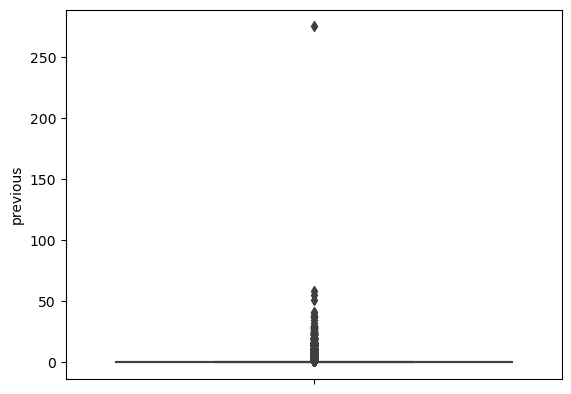

In [108]:
sns.boxplot(y='previous',data=df1)

In [109]:
df1['previous'].describe()

count    45095.000000
mean         0.581816
std          2.306214
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [110]:
df1=df2.copy()

Removing an outlier row

In [111]:
df1.drop(index=29182, axis=1, inplace=True)

In [112]:
df1[df1['previous']==275]

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,Balance_segment,weeks,duration_segment,campaign_segment,pdays_segment,previous_segment


In [113]:
df1.index[29182]

29277

Understanding Age Feature

In [114]:
df1['age'].value_counts()

age
32    2085
31    1996
33    1971
34    1928
35    1893
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64

In [115]:
df_age=df1.copy()

In [116]:
df_age

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,Balance_segment,weeks,duration_segment,campaign_segment,pdays_segment,previous_segment
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,no,8,Week1,2,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,no,2,Week1,1,0,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,no,1,Week1,0,0,0,0
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,...,-1,0,unknown,no,7,Week1,0,0,0,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,...,-1,0,unknown,no,3,Week1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,-1,0,unknown,yes,6,Week3,2,2,0,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,-1,0,unknown,yes,7,Week3,2,1,0,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,184,3,success,yes,9,Week3,2,2,3,3
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,-1,0,unknown,no,5,Week3,2,2,0,0


In [117]:
df1['age'].describe()

count    45094.00000
mean        40.91347
std         10.61119
min         18.00000
25%         33.00000
50%         39.00000
75%         48.00000
max         95.00000
Name: age, dtype: float64

In [118]:
bins = [18, 34, 40, 49, 100]  # Bin boundaries for segmentation
labels = ['18-33','34-39','39-48','49-100']  # Labels for segments   

# Create the 'weeks' feature based on the segmentation
df1['age_segment'] = pd.cut(df1['age'], bins=bins, labels=labels, right=False)

Dropping all the segmented columns (By taking a copy) as DF3

In [119]:
df3=df1.copy()

In [120]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45094 entries, 0 to 45210
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               45094 non-null  int64   
 1   job               45094 non-null  object  
 2   marital           45094 non-null  object  
 3   education         45094 non-null  object  
 4   default           45094 non-null  object  
 5   balance           45094 non-null  int64   
 6   housing           45094 non-null  object  
 7   loan              45094 non-null  object  
 8   contact           45094 non-null  object  
 9   day               45094 non-null  int64   
 10  month             45094 non-null  object  
 11  duration          45094 non-null  int64   
 12  campaign          45094 non-null  int64   
 13  pdays             45094 non-null  int64   
 14  previous          45094 non-null  int64   
 15  poutcome          45094 non-null  object  
 16  y                 45094 non

In [121]:
df3.drop(['duration','campaign','pdays','previous','age','balance','day'],axis=1,inplace=True)

In [122]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45094 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   job               45094 non-null  object  
 1   marital           45094 non-null  object  
 2   education         45094 non-null  object  
 3   default           45094 non-null  object  
 4   housing           45094 non-null  object  
 5   loan              45094 non-null  object  
 6   contact           45094 non-null  object  
 7   month             45094 non-null  object  
 8   poutcome          45094 non-null  object  
 9   y                 45094 non-null  object  
 10  Balance_segment   45094 non-null  category
 11  weeks             45094 non-null  category
 12  duration_segment  45094 non-null  category
 13  campaign_segment  45094 non-null  int64   
 14  pdays_segment     45093 non-null  category
 15  previous_segment  45094 non-null  category
 16  age_segment       45094 non

In [123]:
df3['campaign_segment'] = df3['campaign_segment'].astype('category')

In [124]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45094 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   job               45094 non-null  object  
 1   marital           45094 non-null  object  
 2   education         45094 non-null  object  
 3   default           45094 non-null  object  
 4   housing           45094 non-null  object  
 5   loan              45094 non-null  object  
 6   contact           45094 non-null  object  
 7   month             45094 non-null  object  
 8   poutcome          45094 non-null  object  
 9   y                 45094 non-null  object  
 10  Balance_segment   45094 non-null  category
 11  weeks             45094 non-null  category
 12  duration_segment  45094 non-null  category
 13  campaign_segment  45094 non-null  category
 14  pdays_segment     45093 non-null  category
 15  previous_segment  45094 non-null  category
 16  age_segment       45094 non

# Performing EDA

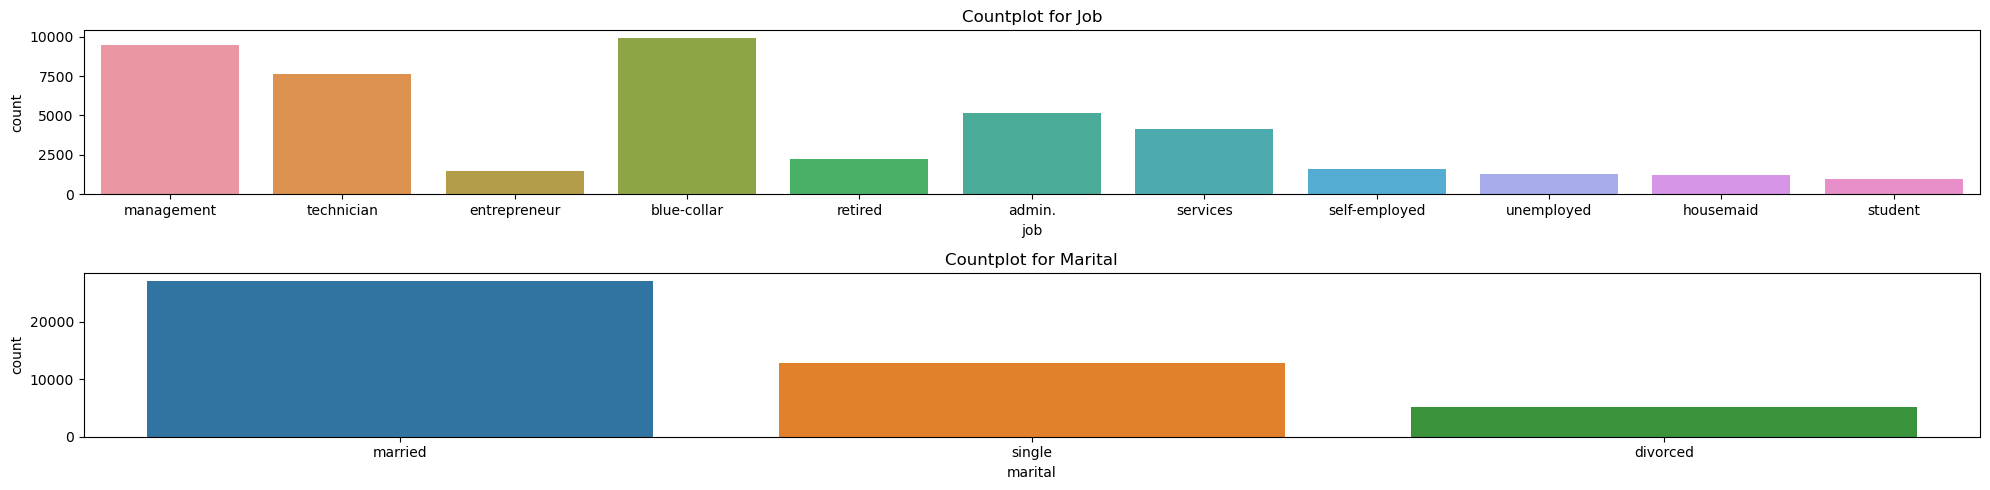

In [125]:
fig, axes = plt.subplots(2, 1, figsize=(20, 5))

# Plot countplot for Job
sns.countplot(x='job', data=df3, ax=axes[0])
axes[0].set_title('Countplot for Job')

# Plot countplot for Marital
sns.countplot(x='marital', data=df3, ax=axes[1])
axes[1].set_title('Countplot for Marital')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

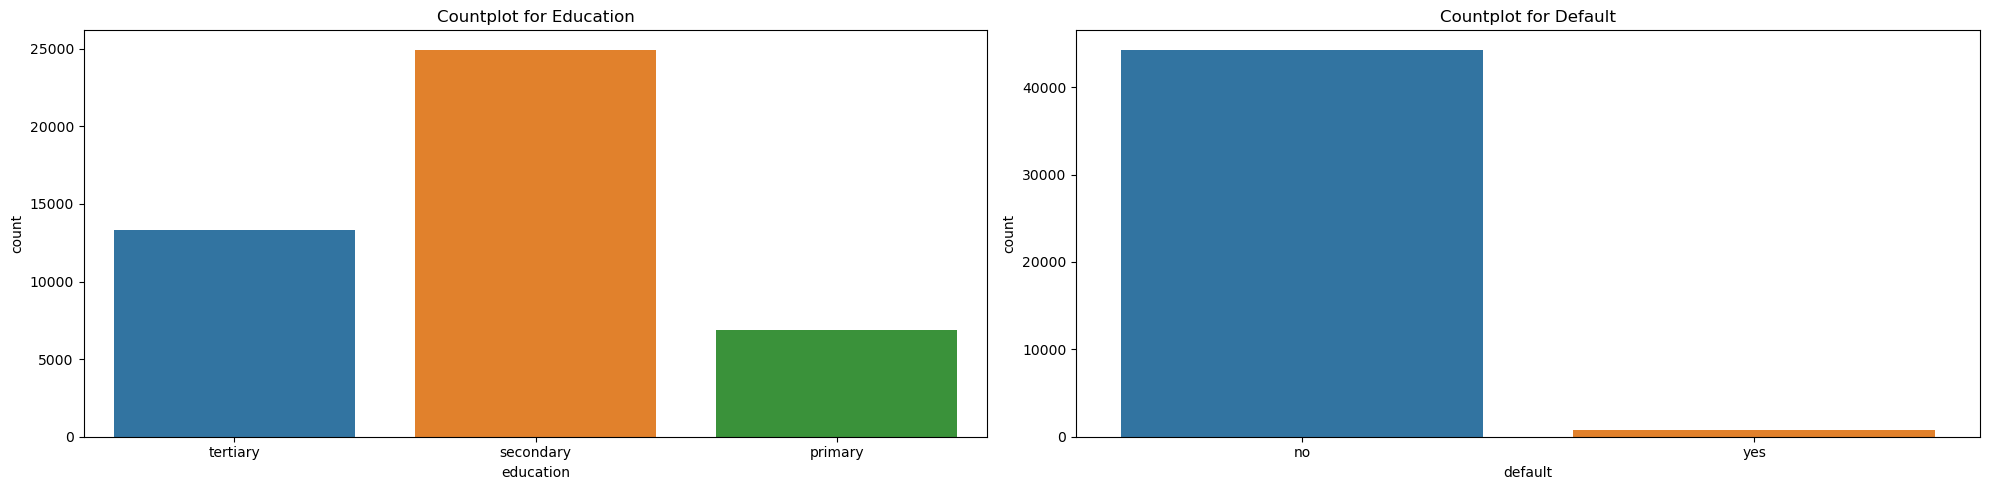

In [126]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Plot countplot for Education
sns.countplot(x='education', data=df3, ax=axes[0])
axes[0].set_title('Countplot for Education')

# Plot countplot for Default
sns.countplot(x='default', data=df3, ax=axes[1])
axes[1].set_title('Countplot for Default')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

From the above graph we can see the maximum cusomters have undergone secondary education and marked default as 'No'

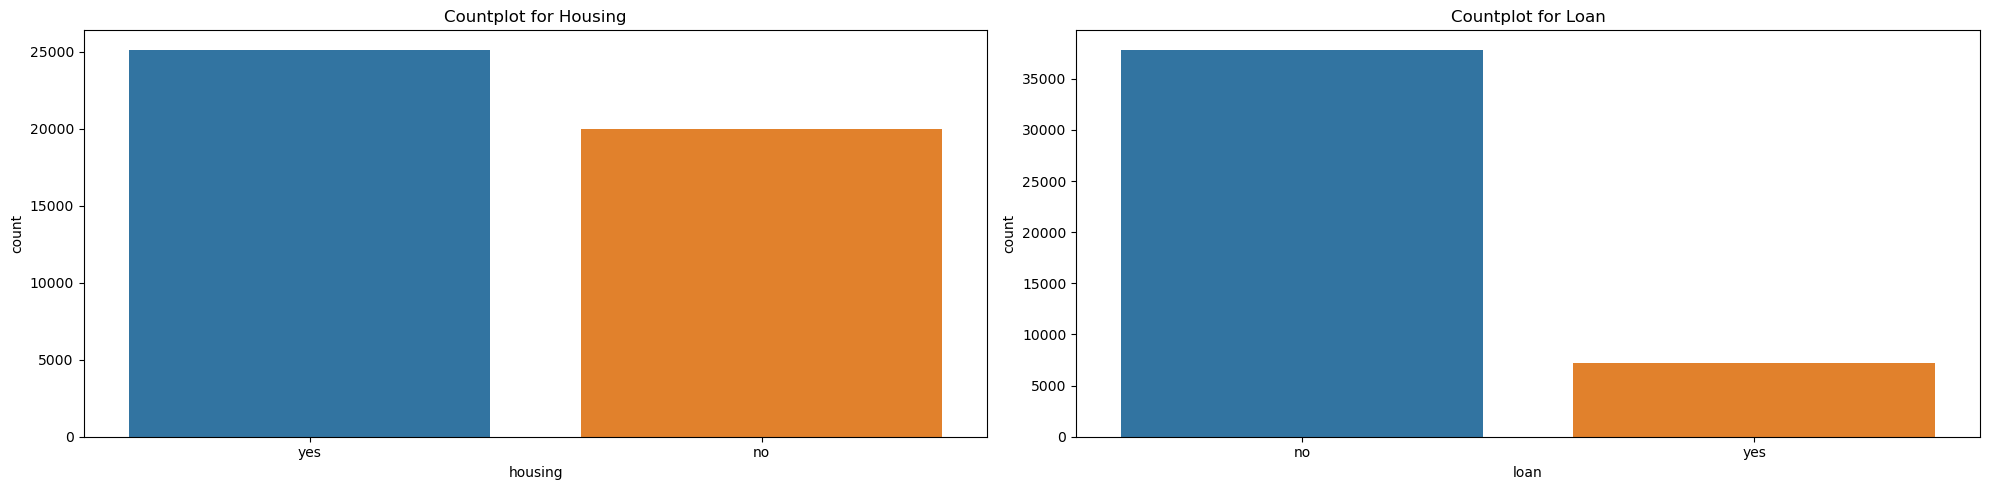

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Plot countplot for Housing
sns.countplot(x='housing', data=df3, ax=axes[0])
axes[0].set_title('Countplot for Housing')

# Plot countplot for Loan
sns.countplot(x='loan', data=df3, ax=axes[1])
axes[1].set_title('Countplot for Loan')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Maximum customers have not taken a loan as per the above graph

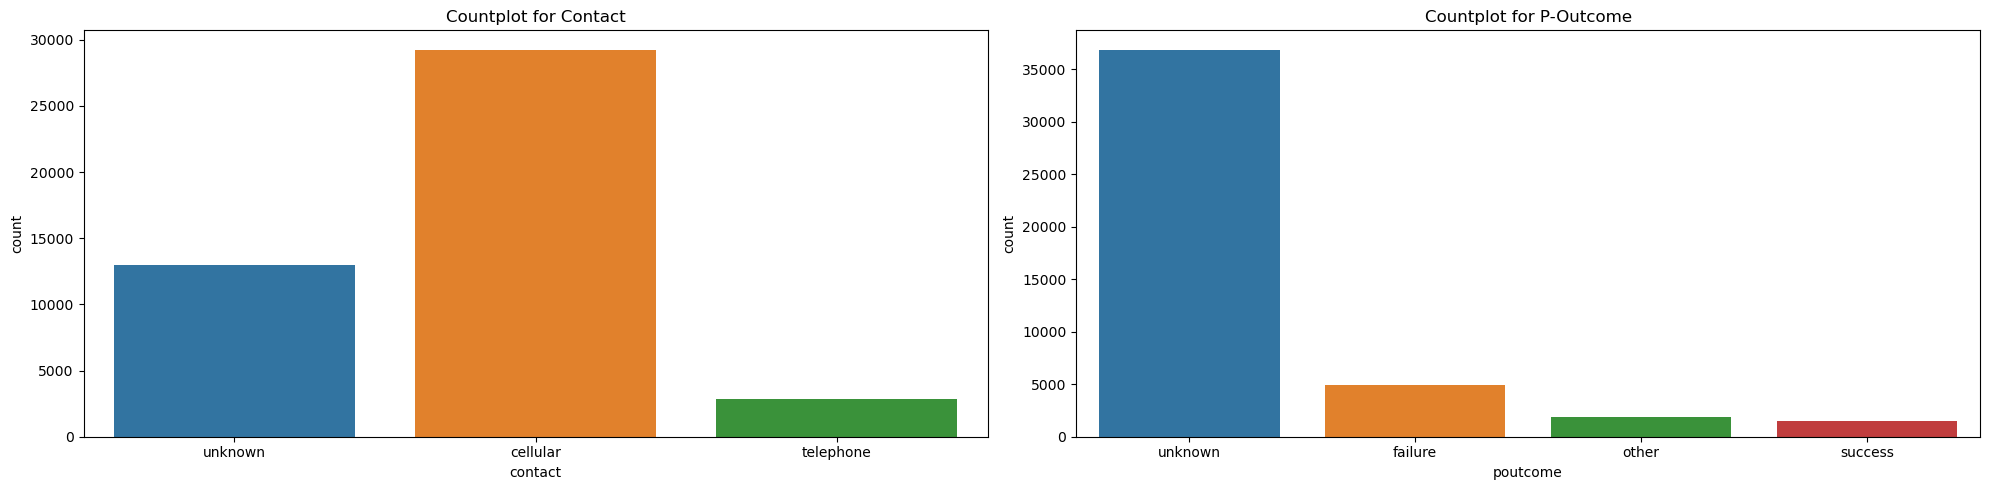

In [128]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Plot countplot for Contact
sns.countplot(x='contact', data=df3, ax=axes[0])
axes[0].set_title('Countplot for Contact')

# Plot countplot for POutcome
sns.countplot(x='poutcome', data=df3, ax=axes[1])
axes[1].set_title('Countplot for P-Outcome')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

As per our analysis over feature engineering and EDA, unknown values are more in Contact and P-Outcome but however these unknown values still have similar outcome over the target variable on taking term-insurance.

Also users contacted over cellular is very high

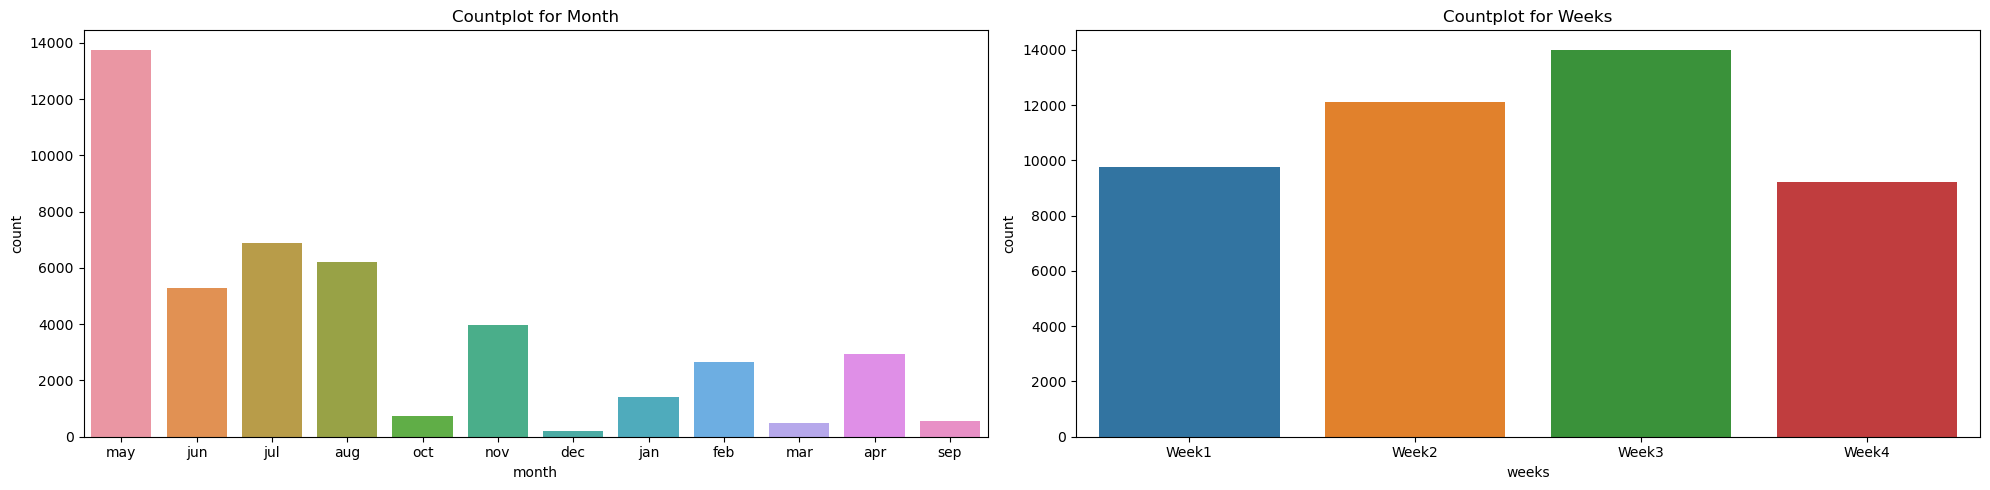

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Plot countplot for Month
sns.countplot(x='month', data=df3, ax=axes[0])
axes[0].set_title('Countplot for Month')

# Plot countplot for Weeks
sns.countplot(x='weeks', data=df3, ax=axes[1])
axes[1].set_title('Countplot for Weeks')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

From the above graph, we can assume that the last contact were done a lot during the month of May and very less during the lean month on December.

Also the weekly distribution does't give us any skewed information, and weeks are normally distributed with week3 having more contacts done.

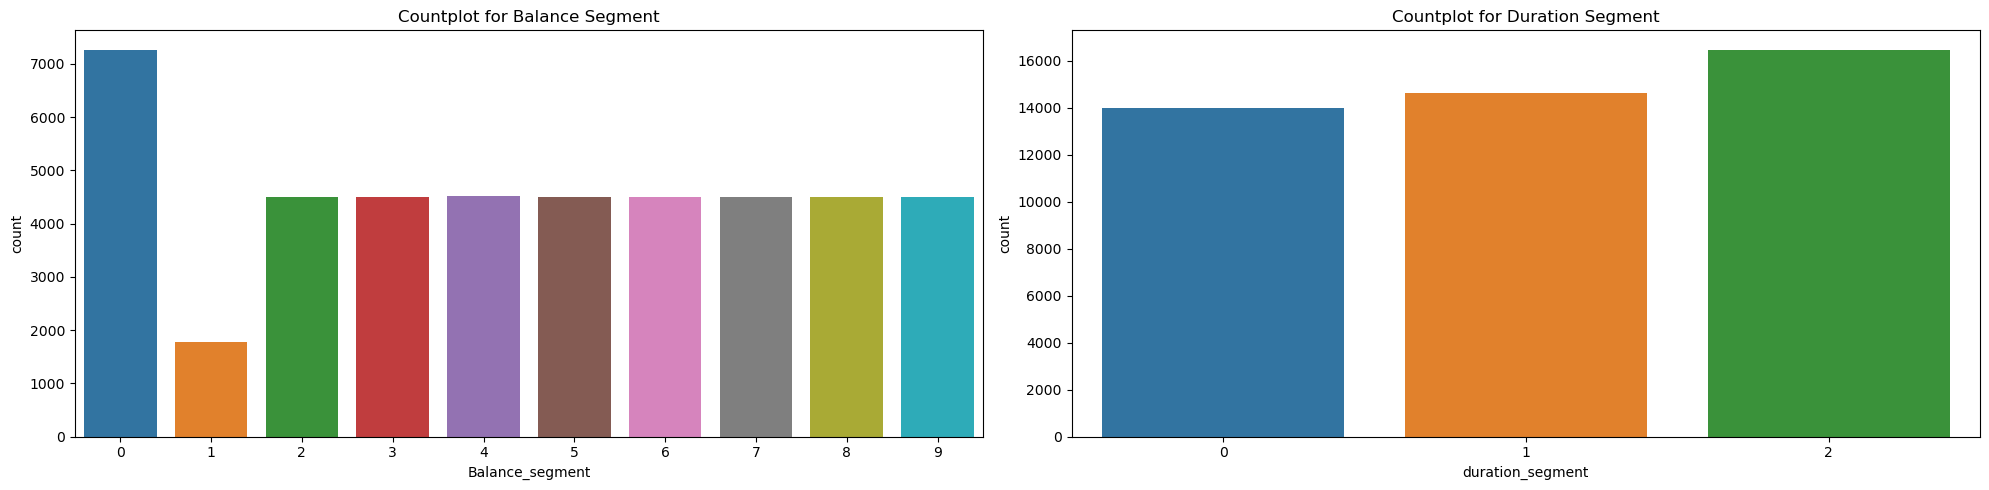

In [130]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Plot countplot for Balance Segment
sns.countplot(x='Balance_segment', data=df3, ax=axes[0])
axes[0].set_title('Countplot for Balance Segment')

# Plot countplot for Duration Segment
sns.countplot(x='duration_segment', data=df3, ax=axes[1])
axes[1].set_title('Countplot for Duration Segment')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Duration is equaly distributed for calls between 0 to 2 minutes, 2 to 4 minutes and greater than 4 minutes

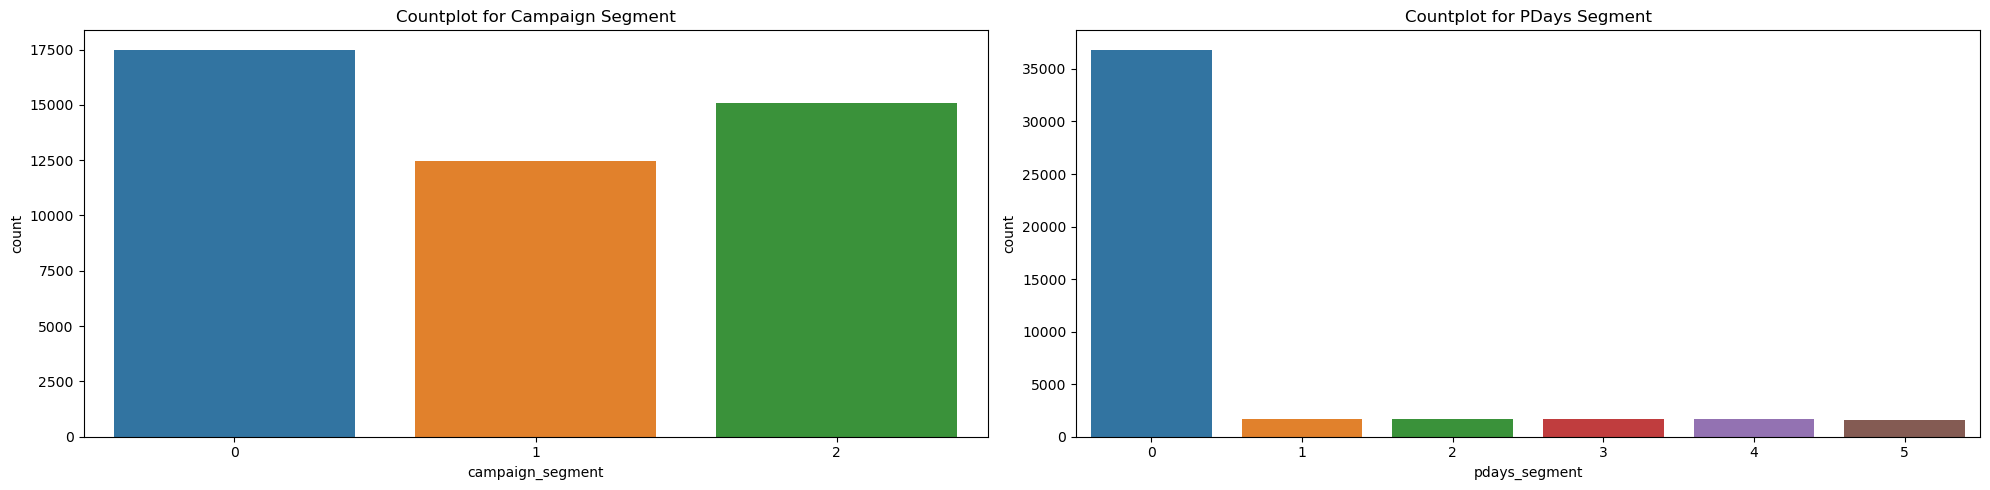

In [131]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Plot countplot for Campaign Segment
sns.countplot(x='campaign_segment', data=df3, ax=axes[0])
axes[0].set_title('Countplot for Campaign Segment')

# Plot countplot for PDays Segment
sns.countplot(x='pdays_segment', data=df3, ax=axes[1])
axes[1].set_title('Countplot for PDays Segment')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Its evident from the above graphs that majority of the users were not contacted previously at all for a campaign

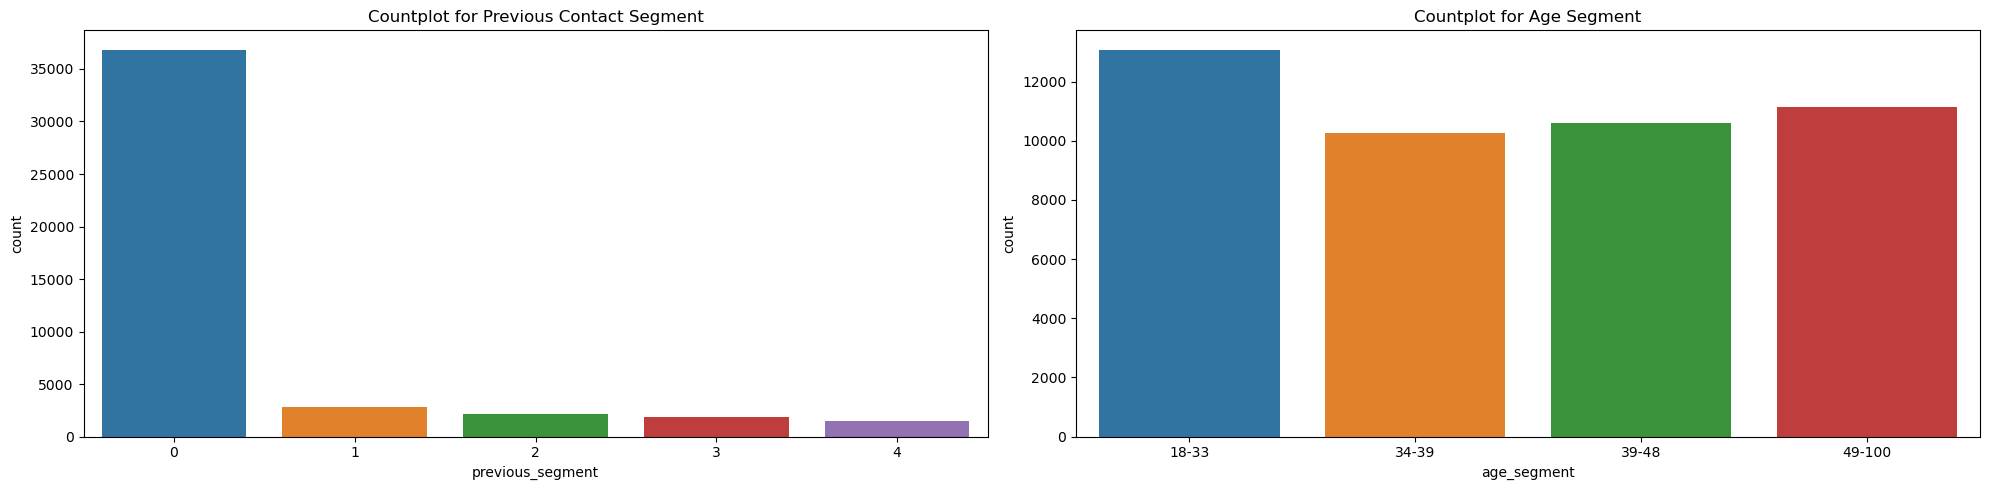

In [132]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Plot countplot for Previous Segment
sns.countplot(x='previous_segment', data=df3, ax=axes[0])
axes[0].set_title('Countplot for Previous Contact Segment')

# Plot countplot for Age Segment
sns.countplot(x='age_segment', data=df3, ax=axes[1])
axes[1].set_title('Countplot for Age Segment')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Lots of contact information trpe is unknown!

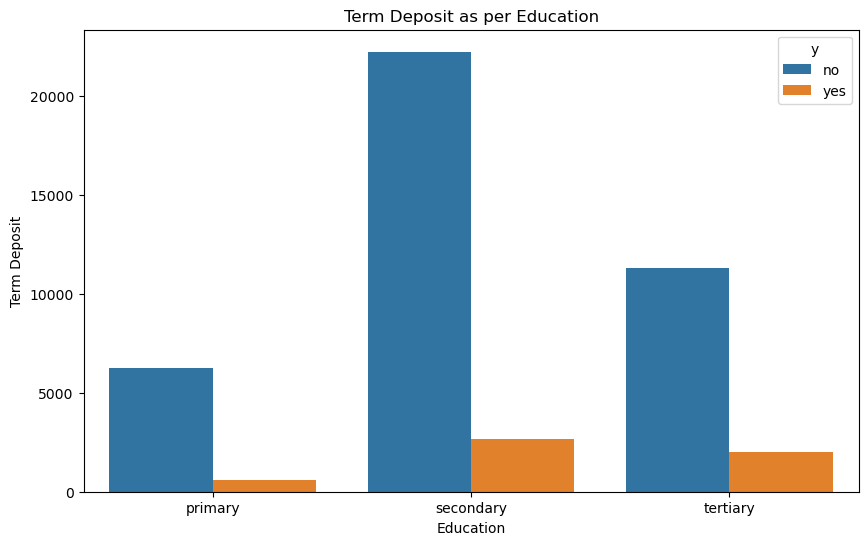

In [133]:
grouped_data = df3.groupby(['education', 'y']).size().reset_index(name='Count')

# Plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(x='education', y='Count', hue='y', data=grouped_data)
plt.title('Term Deposit as per Education')
plt.xlabel('Education')
plt.ylabel('Term Deposit')
plt.show()

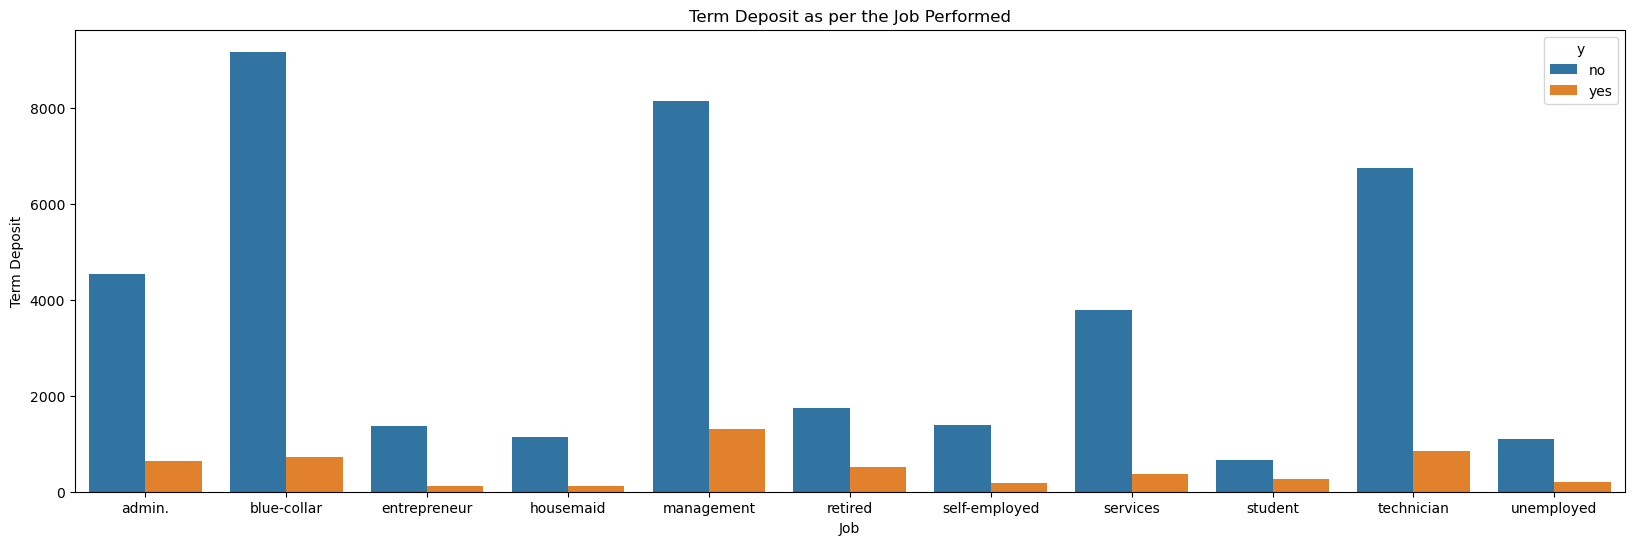

In [134]:
grouped_data = df3.groupby(['job', 'y']).size().reset_index(name='Count')

# Plot the graph
plt.figure(figsize=(20, 6))
sns.barplot(x='job', y='Count', hue='y', data=grouped_data)
plt.title('Term Deposit as per the Job Performed')
plt.xlabel('Job')
plt.ylabel('Term Deposit')
plt.show()

Above graph shows that people in Management, Technician and Admin has more % of customers opting towards the term deposit

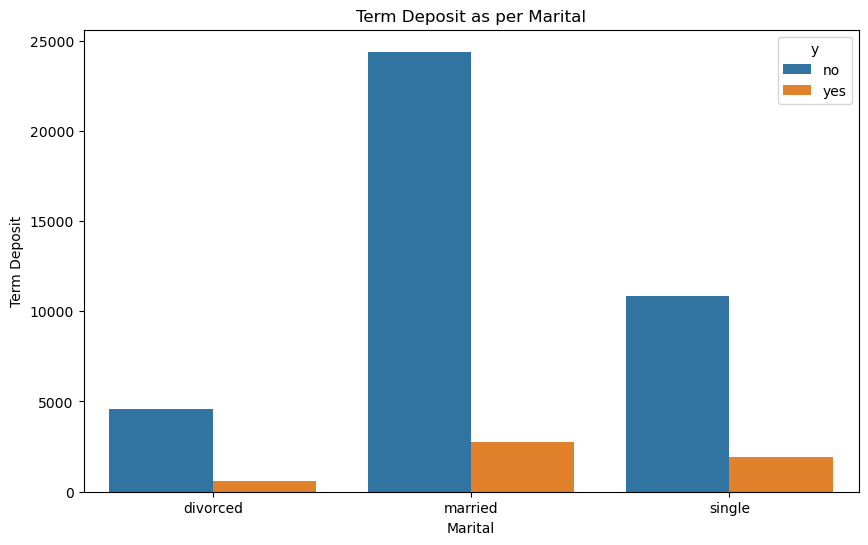

In [135]:
grouped_data = df3.groupby(['marital', 'y']).size().reset_index(name='Count')

# Plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(x='marital', y='Count', hue='y', data=grouped_data)
plt.title('Term Deposit as per Marital')
plt.xlabel('Marital')
plt.ylabel('Term Deposit')
plt.show()

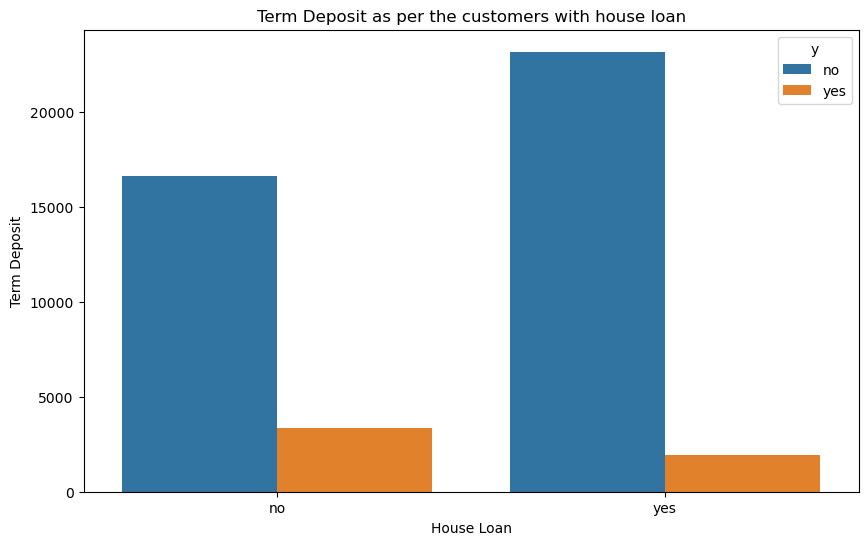

In [136]:
grouped_data = df3.groupby(['housing', 'y']).size().reset_index(name='Count')

# Plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(x='housing', y='Count', hue='y', data=grouped_data)
plt.title('Term Deposit as per the customers with house loan')
plt.xlabel('House Loan')
plt.ylabel('Term Deposit')
plt.show()

Customers with no house loans are more likely to opt term-insurance

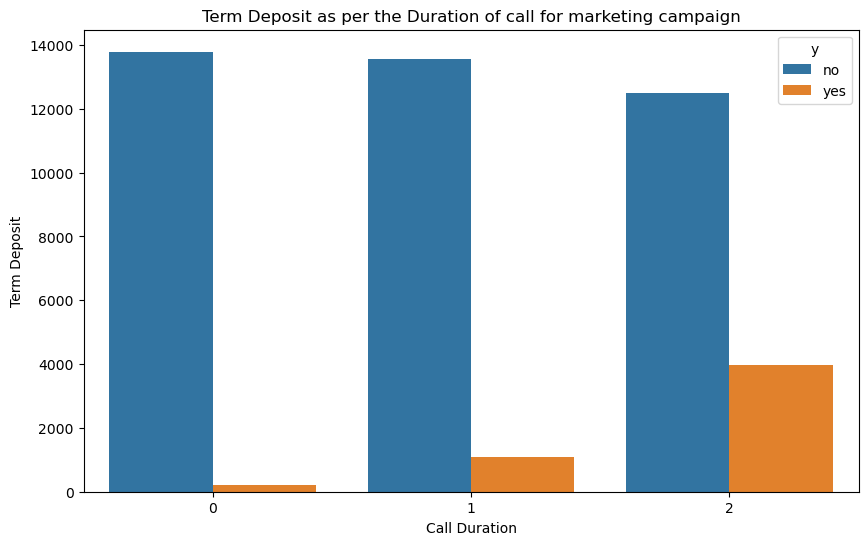

In [137]:
grouped_data = df3.groupby(['duration_segment', 'y']).size().reset_index(name='Count')

# Plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(x='duration_segment', y='Count', hue='y', data=grouped_data)
plt.title('Term Deposit as per the Duration of call for marketing campaign')
plt.xlabel('Call Duration')
plt.ylabel('Term Deposit')
plt.show()

From the above graph it is evident that, customers who are spoken for more than 4 minutes are the most likely candidates to opt the term-deposit

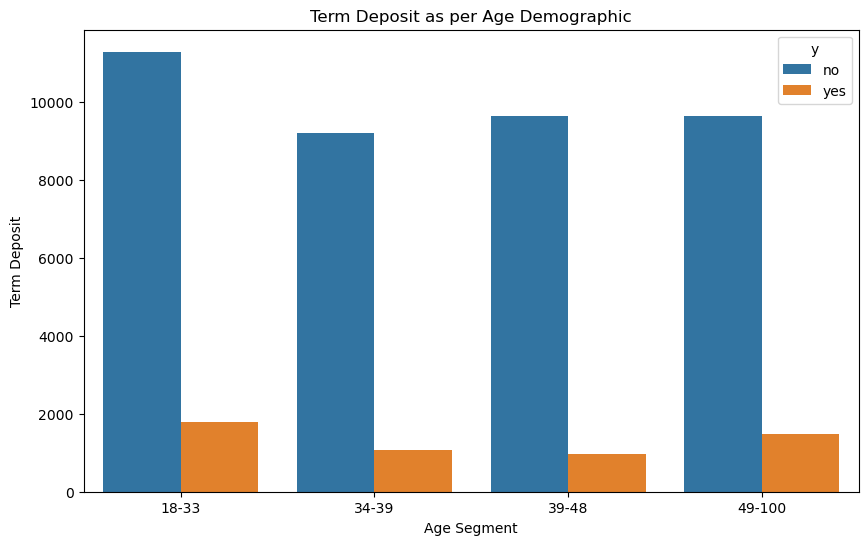

In [138]:
grouped_data = df3.groupby(['age_segment', 'y']).size().reset_index(name='Count')

# Plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(x='age_segment', y='Count', hue='y', data=grouped_data)
plt.title('Term Deposit as per Age Demographic')
plt.xlabel('Age Segment')
plt.ylabel('Term Deposit')
plt.show()

Customers with age greater than 48 are more likely to have term-deposit

In [139]:
df3['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

To understand the number of categories present in each features

In [140]:
for i in df3.columns:
    print('The feature is {} and number of categories are {}'.format(i,len(df3[i].unique())))

The feature is job and number of categories are 11
The feature is marital and number of categories are 3
The feature is education and number of categories are 3
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4
The feature is y and number of categories are 2
The feature is Balance_segment and number of categories are 10
The feature is weeks and number of categories are 4
The feature is duration_segment and number of categories are 3
The feature is campaign_segment and number of categories are 3
The feature is pdays_segment and number of categories are 7
The feature is previous_segment and number of categories are 5
The feature is age_segment and number of categories are 4


Hypothesis Testing

In [141]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df3['age_segment'],df3['y'])
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)

Chi-square statistic: 164.67517630174086
P-value: 1.7951783835936752e-35


Relationship between the variables (balance and term_deposit) is highly significant

In [142]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df3['duration_segment'],df3['y'])
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)

Chi-square statistic: 4161.227162221727
P-value: 0.0


# Encoding (Doing on-hot encoding for nominal values)

Creating a copy of DF3

In [143]:
df4=df3.copy()

In [144]:
df4['job'].value_counts()

job
blue-collar      9904
management       9457
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64

In [145]:
for i in df4.columns:
    print('The feature is {} and number of categories are {}'.format(i,len(df4[i].unique())))

The feature is job and number of categories are 11
The feature is marital and number of categories are 3
The feature is education and number of categories are 3
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4
The feature is y and number of categories are 2
The feature is Balance_segment and number of categories are 10
The feature is weeks and number of categories are 4
The feature is duration_segment and number of categories are 3
The feature is campaign_segment and number of categories are 3
The feature is pdays_segment and number of categories are 7
The feature is previous_segment and number of categories are 5
The feature is age_segment and number of categories are 4


In [146]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45094 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   job               45094 non-null  object  
 1   marital           45094 non-null  object  
 2   education         45094 non-null  object  
 3   default           45094 non-null  object  
 4   housing           45094 non-null  object  
 5   loan              45094 non-null  object  
 6   contact           45094 non-null  object  
 7   month             45094 non-null  object  
 8   poutcome          45094 non-null  object  
 9   y                 45094 non-null  object  
 10  Balance_segment   45094 non-null  category
 11  weeks             45094 non-null  category
 12  duration_segment  45094 non-null  category
 13  campaign_segment  45094 non-null  category
 14  pdays_segment     45093 non-null  category
 15  previous_segment  45094 non-null  category
 16  age_segment       45094 non

In [147]:
df4 = pd.get_dummies(df4, columns=['job'], dtype=int)

In [148]:
df4.drop(['job_unemployed'], axis=1, inplace=True)

In [149]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45094 entries, 0 to 45210
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   marital            45094 non-null  object  
 1   education          45094 non-null  object  
 2   default            45094 non-null  object  
 3   housing            45094 non-null  object  
 4   loan               45094 non-null  object  
 5   contact            45094 non-null  object  
 6   month              45094 non-null  object  
 7   poutcome           45094 non-null  object  
 8   y                  45094 non-null  object  
 9   Balance_segment    45094 non-null  category
 10  weeks              45094 non-null  category
 11  duration_segment   45094 non-null  category
 12  campaign_segment   45094 non-null  category
 13  pdays_segment      45093 non-null  category
 14  previous_segment   45094 non-null  category
 15  age_segment        45094 non-null  category
 16  job_admin

In [150]:
df4 = pd.get_dummies(df4, columns=['marital'], dtype=int)

In [151]:
df4.drop(['marital_single'], axis=1, inplace=True)

In [152]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45094 entries, 0 to 45210
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   education          45094 non-null  object  
 1   default            45094 non-null  object  
 2   housing            45094 non-null  object  
 3   loan               45094 non-null  object  
 4   contact            45094 non-null  object  
 5   month              45094 non-null  object  
 6   poutcome           45094 non-null  object  
 7   y                  45094 non-null  object  
 8   Balance_segment    45094 non-null  category
 9   weeks              45094 non-null  category
 10  duration_segment   45094 non-null  category
 11  campaign_segment   45094 non-null  category
 12  pdays_segment      45093 non-null  category
 13  previous_segment   45094 non-null  category
 14  age_segment        45094 non-null  category
 15  job_admin.         45094 non-null  int32   
 16  job_blue-

In [153]:
df4 = pd.get_dummies(df4, columns=['default'], dtype=int)

In [154]:
df4.drop(['default_no'], axis=1, inplace=True)

In [155]:
df4 = pd.get_dummies(df4, columns=['loan'], dtype=int)

In [156]:
df4.drop(['loan_no'], axis=1, inplace=True)

In [157]:
df4 = pd.get_dummies(df4, columns=['education'], dtype=int)

In [158]:
df4.drop(['education_tertiary'], axis=1, inplace=True)

In [159]:
df4 = pd.get_dummies(df4, columns=['housing'], dtype=int)

In [160]:
df4.drop(['housing_no'], axis=1, inplace=True)

In [161]:
df4 = pd.get_dummies(df4, columns=['contact'], dtype=int)

In [162]:
df4.drop(['contact_unknown'], axis=1, inplace=True)

In [163]:
df4 = pd.get_dummies(df4, columns=['month'], dtype=int)

In [164]:
df4.drop(['month_dec'], axis=1, inplace=True)

In [165]:
df4 = pd.get_dummies(df4, columns=['poutcome'], dtype=int)

In [166]:
df4.drop(['poutcome_unknown'], axis=1, inplace=True)

Not Encoding the ordinal value of "Balance_Segment" and planned to keep it as such for ML modelling

In [167]:
df4 = pd.get_dummies(df4, columns=['weeks'], dtype=int)

In [168]:
df4.drop(['weeks_Week4'], axis=1, inplace=True)

In [169]:
df4 = pd.get_dummies(df4, columns=['duration_segment'], dtype=int)

In [170]:
df4.drop(['duration_segment_2'], axis=1, inplace=True)

In [171]:
df4 = pd.get_dummies(df4, columns=['campaign_segment'], dtype=int)

In [172]:
df4 = pd.get_dummies(df4, columns=['age_segment'], dtype=int)

In [173]:
df4.drop(['age_segment_49-100'], axis=1, inplace=True)

In [174]:
df4

,y,Balance_segment,pdays_segment,previous_segment,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,weeks_Week2,weeks_Week3,duration_segment_0,duration_segment_1,campaign_segment_0,campaign_segment_1,campaign_segment_2,age_segment_18-33,age_segment_34-39,age_segment_39-48
0,no,8,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,no,2,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,no,1,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,no,7,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
5,no,3,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,yes,6,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
45207,yes,7,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
45208,yes,9,3,3,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
45209,no,5,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


Stopping the encoding as rest all are ordinal values

In [175]:
df4.shape

(45094, 48)

In [176]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45094 entries, 0 to 45210
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   y                    45094 non-null  object  
 1   Balance_segment      45094 non-null  category
 2   pdays_segment        45093 non-null  category
 3   previous_segment     45094 non-null  category
 4   job_admin.           45094 non-null  int32   
 5   job_blue-collar      45094 non-null  int32   
 6   job_entrepreneur     45094 non-null  int32   
 7   job_housemaid        45094 non-null  int32   
 8   job_management       45094 non-null  int32   
 9   job_retired          45094 non-null  int32   
 10  job_self-employed    45094 non-null  int32   
 11  job_services         45094 non-null  int32   
 12  job_student          45094 non-null  int32   
 13  job_technician       45094 non-null  int32   
 14  marital_divorced     45094 non-null  int32   
 15  marital_married      450

In [177]:
mapping = {'yes': 1, 'no': 0}
df4['y'] = df4['y'].map(mapping)

# Machine Learning

In [178]:
df4

,y,Balance_segment,pdays_segment,previous_segment,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,weeks_Week2,weeks_Week3,duration_segment_0,duration_segment_1,campaign_segment_0,campaign_segment_1,campaign_segment_2,age_segment_18-33,age_segment_34-39,age_segment_39-48
0,0,8,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,0,7,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
5,0,3,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,6,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
45207,1,7,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
45208,1,9,3,3,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
45209,0,5,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [179]:
df4.columns

Index(['y', 'Balance_segment', 'pdays_segment', 'previous_segment',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'marital_divorced', 'marital_married',
       'default_yes', 'loan_yes', 'education_primary', 'education_secondary',
       'housing_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success', 'weeks_Week1',
       'weeks_Week2', 'weeks_Week3', 'duration_segment_0',
       'duration_segment_1', 'campaign_segment_0', 'campaign_segment_1',
       'campaign_segment_2', 'age_segment_18-33', 'age_segment_34-39',
       'age_segment_39-48'],
      dtype='object')

In [180]:
X=df4[['Balance_segment','pdays_segment',
       'previous_segment', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'marital_divorced',
       'marital_married', 'default_yes', 'loan_yes', 'education_primary',
       'education_secondary', 'housing_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'weeks_Week1', 'weeks_Week2', 'weeks_Week3',
       'duration_segment_0', 'duration_segment_1', 'age_segment_18-33',
       'age_segment_34-39', 'age_segment_39-48']]

Y=df4[['y']]

In [181]:
X

,Balance_segment,pdays_segment,previous_segment,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,poutcome_other,poutcome_success,weeks_Week1,weeks_Week2,weeks_Week3,duration_segment_0,duration_segment_1,age_segment_18-33,age_segment_34-39,age_segment_39-48
0,8,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,7,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
5,3,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
45207,7,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
45208,9,3,3,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
45209,5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [182]:
Y

,y
0,0
1,0
2,0
3,0
5,0
...,...
45206,1
45207,1
45208,1
45209,0


# Constructing a Logistic Regression

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [184]:
# splitting data

X_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=32)

In [185]:
X_train

,Balance_segment,pdays_segment,previous_segment,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,poutcome_other,poutcome_success,weeks_Week1,weeks_Week2,weeks_Week3,duration_segment_0,duration_segment_1,age_segment_18-33,age_segment_34-39,age_segment_39-48
21597,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
39416,9,1,2,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
28255,0,3,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
25505,9,2,2,0,0,0,0,0,0,1,...,1,0,0,0,1,0,1,1,0,0
41149,9,5,4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24916,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
20490,4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
9548,9,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
42653,9,3,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [186]:
#Instantiating and fitting the model to training Dataset

log_reg=LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [187]:
# prediction

y_pred=log_reg.predict(x_test)

In [188]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [189]:
# conf matrix

# the confusion matrix shows the same format everytime: (TN , FP, FN , TP) with actuals being the rows and predicted being the 
# columns

from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[7864,  139],
       [ 744,  272]], dtype=int64)

In [190]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      8003
           1       0.66      0.27      0.38      1016

    accuracy                           0.90      9019
   macro avg       0.79      0.63      0.66      9019
weighted avg       0.89      0.90      0.88      9019



Not a bad score but the precision and recall are low

In [191]:
y_pred_prob=log_reg.predict_proba(x_test)
print(y_pred_prob)

[[0.96776018 0.03223982]
 [0.82566407 0.17433593]
 [0.97293281 0.02706719]
 ...
 [0.94265623 0.05734377]
 [0.98805318 0.01194682]
 [0.83511064 0.16488936]]


AUC 0.876

In [192]:
y_pred_prob=log_reg.predict_proba(x_test)[::,1]
auc=metrics.roc_auc_score(y_test,y_pred_prob)
auc

0.8768024121859814

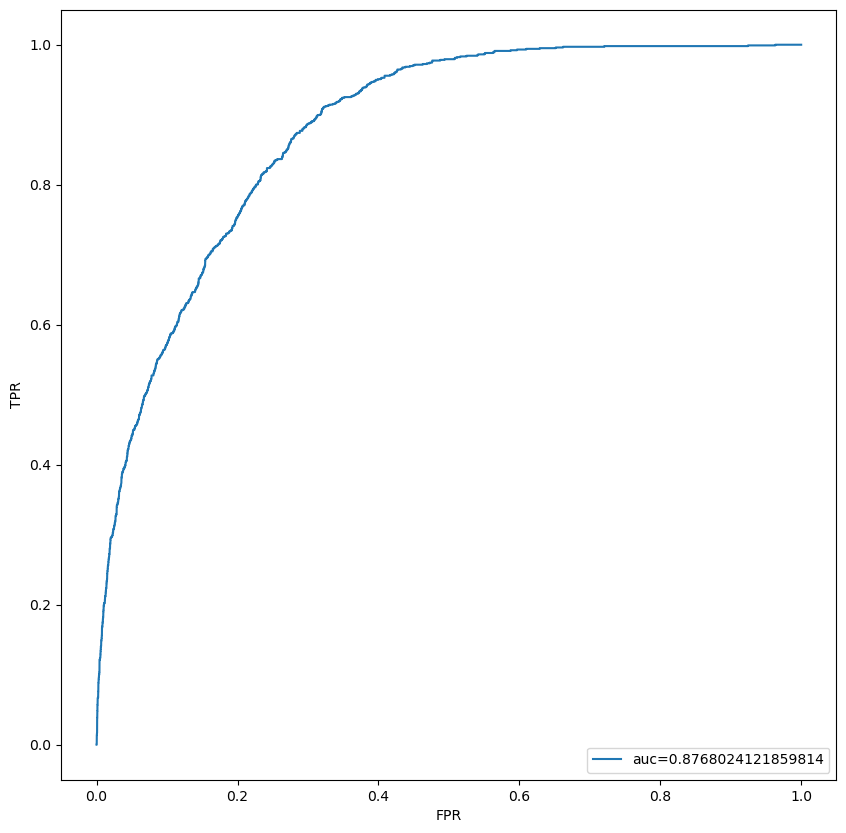

In [193]:
# roc plot

y_pred_prob=log_reg.predict_proba(x_test)[::,1]


fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_prob)
auc=metrics.roc_auc_score(y_test,y_pred_prob)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# Decision Tree

In [194]:
from sklearn.tree import DecisionTreeClassifier

In [195]:
y_train

,y
21597,0
39416,1
28255,0
25505,0
41149,1
...,...
24916,0
20490,0
9548,0
42653,0


In [196]:
X=df4[['Balance_segment','pdays_segment',
       'previous_segment', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'marital_divorced',
       'marital_married', 'default_yes', 'loan_yes', 'education_primary',
       'education_secondary', 'housing_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'weeks_Week1', 'weeks_Week2', 'weeks_Week3',
       'duration_segment_0', 'duration_segment_1', 'age_segment_18-33',
       'age_segment_34-39', 'age_segment_39-48']]

Y=df4[['y']]

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

In [198]:
from sklearn.metrics import accuracy_score

In [199]:
# Dec tree with depth 4
model_dt_4=DecisionTreeClassifier(random_state=1,max_depth=4)
model_dt_4.fit(X_train,y_train)

y_pred_4=model_dt_4.predict(X_test)
accuracy_score(y_test,y_pred_4)

0.8931145359795987

In [200]:
# Dec tree with depth 6
model_dt_6=DecisionTreeClassifier(random_state=1,max_depth=6)
model_dt_6.fit(X_train,y_train)

y_pred_6=model_dt_6.predict(X_test)
accuracy_score(y_test,y_pred_6)

0.8925601507927708

Performing Hyper parameter tuning using GridSearch CV

In [201]:
from sklearn.model_selection import GridSearchCV

In [202]:
param_dist = {'max_depth': [2, 3, 4,5,6,7,8,9,10],
              'criterion': ['gini', 'entropy'],
             'max_leaf_nodes':[4,6,8,10,12,14]}

In [203]:
fit_dt = DecisionTreeClassifier(random_state=17)

In [204]:
cv_dt = GridSearchCV(fit_dt, cv = 15,
                     param_grid=param_dist)

In [205]:
cv_dt.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [4, 6, 8, 10, 12, 14]})

In [206]:
print('Best Parameters using grid search: \n', cv_dt.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': 14}


In [207]:
cv_dt.best_score_

0.8978516978516977

In [208]:
fit_dt.set_params(criterion = 'gini',
                max_depth =8, max_leaf_nodes=14)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=14, random_state=17)

In [209]:
fit_dt.fit(X_train, y_train)
y_pred = fit_dt.predict(X_test)

In [210]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7951
           1       0.66      0.28      0.39      1068

    accuracy                           0.90      9019
   macro avg       0.79      0.63      0.67      9019
weighted avg       0.88      0.90      0.88      9019



In [211]:
accuracy_rf = accuracy_score(y_test,y_pred)
accuracy_rf

0.8976604945115867

89.76% Accuracy, better than logical regression!

# Random Forest Algorithm

In [212]:
X=df4[['Balance_segment','pdays_segment',
       'previous_segment', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'marital_divorced',
       'marital_married', 'default_yes', 'loan_yes', 'education_primary',
       'education_secondary', 'housing_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'weeks_Week1', 'weeks_Week2', 'weeks_Week3',
       'duration_segment_0', 'duration_segment_1', 'age_segment_18-33',
       'age_segment_34-39', 'age_segment_39-48']]

Y=df4[['y']]

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [215]:
fit_rf=RandomForestClassifier(random_state=10)

In [216]:
param_dist={'max_depth':[2,3,4,6,8,10],
           'max_features':['auto','sqrt','log2'],
           'criterion':['gini','entropy'],
           'n_estimators':[5,10,15,20,25,30]}

cv_rf=GridSearchCV(fit_rf,cv=10,param_grid=param_dist)

cv_rf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 10, 15, 20, 25, 30]})

In [217]:
cv_rf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 25}

In [218]:
y_pred=cv_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test,y_pred)
accuracy_rf

0.8944450604279853

In [219]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7950
           1       0.72      0.18      0.28      1069

    accuracy                           0.89      9019
   macro avg       0.81      0.58      0.61      9019
weighted avg       0.88      0.89      0.86      9019



Not an improvement, just a similar score in compared to Decision Tree

# Naive Bayes Classifier Algorithm

In [220]:
from sklearn.naive_bayes import GaussianNB

In [221]:
nb_model = GaussianNB()

In [222]:
X=df4[['Balance_segment','pdays_segment',
       'previous_segment', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'marital_divorced',
       'marital_married', 'default_yes', 'loan_yes', 'education_primary',
       'education_secondary', 'housing_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'weeks_Week1', 'weeks_Week2', 'weeks_Week3',
       'duration_segment_0', 'duration_segment_1', 'age_segment_18-33',
       'age_segment_34-39', 'age_segment_39-48']]

Y=df4[['y']]

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [224]:
nb_model.fit(X_train,y_train)

GaussianNB()

In [225]:
y_pred = nb_model.predict(X_test)

In [226]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7950
           1       0.12      1.00      0.21      1069

    accuracy                           0.12      9019
   macro avg       0.06      0.50      0.11      9019
weighted avg       0.01      0.12      0.03      9019



The score is lot less than the best model score of 89.3% achieved above, so this will also be ruled out

Finally, the top 2 models achieved so far:
89.31 : Decision Tree (criterion = 'gini',max_depth =8, max_leaf_nodes=14)
89.18 : Random Forest 

# Therefore the Final Best Model achieved yet is Decision Tree with 89.31% Accuracy (Precision: 88%, Recall: 89 & F1Score: 87%). Lets continue with change in encoding pattern.

Now, as additional part, using the previous dataframe (DF2) to do less encoding and Balance as scaling instead of encoding like the above approach to see its comparitive model score

In [227]:
df4=df2.copy()

In [228]:
df4.drop(['Balance_segment'], axis=1, inplace=True)

In [229]:
df4['job'].value_counts()

job
blue-collar      9904
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64

In [230]:
df4 = pd.get_dummies(df4, columns=['job'], dtype=int)

In [231]:
df4.drop(['job_unemployed'],axis=1,inplace=True)

In [232]:
df4 = pd.get_dummies(df4, columns=['education'], dtype=int)

In [233]:
df4.drop(['education_tertiary'],axis=1,inplace=True)

In [234]:
df4 = pd.get_dummies(df4, columns=['marital'], dtype=int)

In [235]:
df4.drop(['marital_single'],axis=1,inplace=True)

In [236]:
df4 = pd.get_dummies(df4, columns=['default'], dtype=int)

In [237]:
df4.drop(['default_yes'],axis=1,inplace=True)

In [238]:
df4 = pd.get_dummies(df4, columns=['housing'], dtype=int)

In [239]:
df4.drop(['housing_yes'],axis=1,inplace=True)

In [240]:
df4 = pd.get_dummies(df4, columns=['contact'], dtype=int)

In [241]:
df4.drop(['contact_unknown'],axis=1,inplace=True)

In [242]:
df4['loan'].value_counts()

loan
no     37851
yes     7244
Name: count, dtype: int64

In [243]:
df4.drop(['loan'],axis=1,inplace=True)

In [244]:
df4['month'].value_counts()

month
may    13753
jul     6885
aug     6219
jun     5297
nov     3967
apr     2928
feb     2647
jan     1398
oct      735
sep      576
mar      477
dec      213
Name: count, dtype: int64

In [245]:
mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

# Replace values using map
df4['month'] = df4['month'].map(mapping)

In [246]:
df4['poutcome'].value_counts()

poutcome
unknown    36843
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [247]:
df4 = pd.get_dummies(df4, columns=['poutcome'], dtype=int)

In [248]:
df4.drop(['poutcome_unknown'], axis=1, inplace=True)

In [249]:
df4 = pd.get_dummies(df4, columns=['weeks'], dtype=int)

In [250]:
df4.drop(['weeks_Week4'], axis=1, inplace=True)

In [251]:
mapping = {'yes': 1, 'no': 0}

# Replace values using map
df4['y'] = df4['y'].map(mapping)

In [252]:
df4['pdays_segment'].value_counts()

pdays_segment
0    36838
4     1704
1     1661
2     1654
3     1647
5     1590
Name: count, dtype: int64

In [253]:
mapping = {'0.0': 0, '1.0': 1, '2.0': 2, '3.0': 3, '4.0': 4, '5.0': 5}

# Replace values using map
df4['pdays_segments'] = df4['pdays_segment'].map(mapping)

In [254]:
df4.drop(['pdays_segments'], axis=1, inplace=True)

In [255]:
df4

,age,balance,day,month,duration,campaign,pdays,previous,y,duration_segment,...,default_no,housing_no,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,weeks_Week1,weeks_Week2,weeks_Week3
0,58,2143,5,5,261,1,-1,0,0,2,...,1,0,0,0,0,0,0,1,0,0
1,44,29,5,5,151,1,-1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,33,2,5,5,76,1,-1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,47,1506,5,5,92,1,-1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,35,231,5,5,139,1,-1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,11,977,3,-1,0,1,2,...,1,1,1,0,0,0,0,0,0,1
45207,71,1729,17,11,456,2,-1,0,1,2,...,1,1,1,0,0,0,0,0,0,1
45208,72,5715,17,11,1127,5,184,3,1,2,...,1,1,1,0,0,0,1,0,0,1
45209,57,668,17,11,508,4,-1,0,0,2,...,1,1,0,1,0,0,0,0,0,1


<Axes: ylabel='balance'>

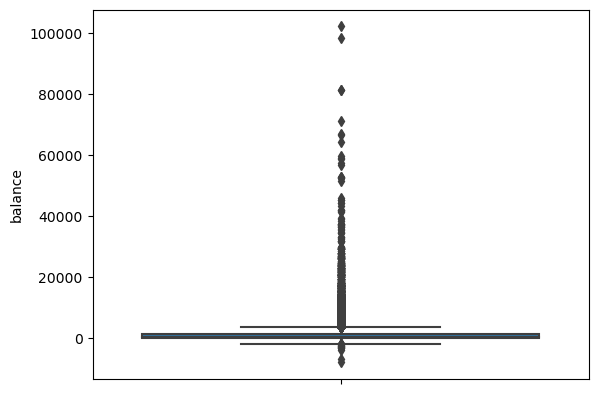

In [256]:
sns.boxplot(y='balance',data=df1)

Due to outliers, using standard scaler

In [257]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df4[['balance']])
df4['Balance_scaled'] = scaler.transform(df4[['balance']])

# Machine Learning

Decision Tree

In [258]:
from sklearn.tree import DecisionTreeClassifier

In [259]:
df4.columns

Index(['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'duration_segment', 'campaign_segment',
       'pdays_segment', 'previous_segment', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'education_primary', 'education_secondary', 'marital_divorced',
       'marital_married', 'default_no', 'housing_no', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'weeks_Week1', 'weeks_Week2', 'weeks_Week3',
       'Balance_scaled'],
      dtype='object')

In [260]:
X=df4[['age', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous','duration_segment', 'campaign_segment',
       'pdays_segment', 'previous_segment', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'education_primary', 'education_secondary', 'marital_divorced',
       'marital_married', 'default_no', 'housing_no', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'weeks_Week1', 'weeks_Week2', 'weeks_Week3',
       'Balance_scaled']]

Y=df4[['y']]

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

In [262]:
from sklearn.metrics import accuracy_score

In [263]:
from sklearn.model_selection import GridSearchCV

In [264]:
param_dist = {'max_depth': [2, 3, 4,5,6,7,8,9,10],
              'criterion': ['gini', 'entropy'],
             'max_leaf_nodes':[4,6,8,10,12,14]}

In [265]:
fit_dt = DecisionTreeClassifier(random_state=17)

In [266]:
cv_dt = GridSearchCV(fit_dt, cv = 15,
                     param_grid=param_dist)

In [267]:
cv_dt.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [4, 6, 8, 10, 12, 14]})

In [268]:
print('Best Parameters using grid search: \n', cv_dt.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 14}


In [269]:
cv_dt.best_score_

0.9006820209812728

In [270]:
fit_dt.set_params(criterion = 'gini',
                max_depth =6, max_leaf_nodes=14)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=14, random_state=17)

In [271]:
fit_dt.fit(X_train, y_train)
y_pred = fit_dt.predict(X_test)

In [272]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7961
           1       0.62      0.38      0.47      1058

    accuracy                           0.90      9019
   macro avg       0.77      0.67      0.71      9019
weighted avg       0.89      0.90      0.89      9019



Improved Precision and Accuracy over previous Decision Tree. With 90% accuracy and 89% of Precision. However, the recall is lesser.

# Random Forest

In [273]:
X=df4[['age', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous','duration_segment', 'campaign_segment','previous_segment', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'education_primary', 'education_secondary', 'marital_divorced',
       'marital_married', 'default_no', 'housing_no', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'weeks_Week1', 'weeks_Week2', 'weeks_Week3',
       'Balance_scaled']]

Y=df4[['y']]

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

In [275]:
fit_rf=RandomForestClassifier(random_state=10)

In [276]:
param_dist={'max_depth':[2,3,4,6,8,10],
           'max_features':['auto','sqrt','log2'],
           'criterion':['gini','entropy'],
           'n_estimators':[5,10,15,20,25,30]}

cv_rf=GridSearchCV(fit_rf,cv=10,param_grid=param_dist)

cv_rf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 10, 15, 20, 25, 30]})

In [277]:
cv_rf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 15}

In [278]:
y_pred=cv_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test,y_pred)
accuracy_rf

0.9007650515578224

In [279]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7961
           1       0.67      0.31      0.42      1058

    accuracy                           0.90      9019
   macro avg       0.79      0.64      0.68      9019
weighted avg       0.89      0.90      0.88      9019



# Decision Tree with reduced features

In [280]:
X=df4[['age', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous','duration_segment', 'campaign_segment','job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'education_primary', 'education_secondary', 'marital_divorced',
       'marital_married', 'default_no', 'housing_no', 'contact_cellular',
       'contact_telephone','weeks_Week1', 'weeks_Week2', 'weeks_Week3',
       'Balance_scaled']]

Y=df4[['y']]

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

In [282]:
from sklearn.metrics import accuracy_score

In [283]:
from sklearn.model_selection import GridSearchCV

In [284]:
param_dist = {'max_depth': [2, 3, 4,5,6,7,8,9,10],
              'criterion': ['gini', 'entropy'],
             'max_leaf_nodes':[4,6,8,10,12,14]}

In [285]:
fit_dt = DecisionTreeClassifier(random_state=17)

In [286]:
cv_dt = GridSearchCV(fit_dt, cv = 15,
                     param_grid=param_dist)

In [287]:
cv_dt.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [4, 6, 8, 10, 12, 14]})

In [288]:
print('Best Parameters using grid search: \n', cv_dt.best_params_)

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 14}


In [289]:
cv_dt.best_score_

0.8914514360898402

In [290]:
fit_dt.set_params(criterion = 'gini',
                max_depth =6, max_leaf_nodes=14)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=14, random_state=17)

In [291]:
fit_dt.fit(X_train, y_train)
y_pred = fit_dt.predict(X_test)

In [292]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7961
           1       0.56      0.38      0.45      1058

    accuracy                           0.89      9019
   macro avg       0.74      0.67      0.70      9019
weighted avg       0.88      0.89      0.88      9019



Removing Jobs Feature

In [293]:
X=df4[['age', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous','duration_segment', 'campaign_segment',
       'education_primary', 'education_secondary', 'marital_divorced',
       'marital_married', 'default_no', 'housing_no', 'contact_cellular',
       'contact_telephone','weeks_Week1', 'weeks_Week2', 'weeks_Week3',
       'Balance_scaled']]

Y=df4[['y']]

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

In [295]:
X_train

,age,day,month,duration,campaign,pdays,previous,duration_segment,campaign_segment,education_primary,...,marital_divorced,marital_married,default_no,housing_no,contact_cellular,contact_telephone,weeks_Week1,weeks_Week2,weeks_Week3,Balance_scaled
30997,41,9,2,244,3,-1,0,2,2,1,...,0,1,1,1,1,0,0,1,0,-0.178028
24640,50,17,11,49,2,-1,0,0,1,0,...,0,1,1,0,0,1,0,0,1,-0.039330
940,40,7,5,112,3,-1,0,0,2,0,...,0,1,1,0,0,0,1,0,0,-0.427158
12009,45,20,6,693,3,-1,0,2,2,0,...,0,1,1,1,0,0,0,0,1,-0.231930
24537,32,17,11,500,2,-1,0,2,1,0,...,0,1,1,0,1,0,0,0,1,1.614852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41137,30,18,8,101,1,-1,0,0,0,0,...,0,1,1,1,1,0,0,0,1,-0.402508
22719,36,25,8,84,4,-1,0,0,2,0,...,0,1,1,1,1,0,0,0,0,-0.432088
43004,71,11,2,660,1,-1,0,2,0,0,...,0,1,1,1,1,0,0,1,0,0.115472
38467,48,15,5,54,5,-1,0,0,2,1,...,0,0,1,0,1,0,0,1,0,-0.367012


In [296]:
param_dist = {'max_depth': [2, 3, 4,5,6,7,8,9,10],
              'criterion': ['gini', 'entropy'],
             'max_leaf_nodes':[4,6,8,10,12,14]}

In [297]:
fit_dt = DecisionTreeClassifier(random_state=17)

In [298]:
cv_dt = GridSearchCV(fit_dt, cv = 15,
                     param_grid=param_dist)

In [299]:
cv_dt.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [4, 6, 8, 10, 12, 14]})

In [300]:
print('Best Parameters using grid search: \n', cv_dt.best_params_)

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 14}


In [301]:
cv_dt.best_score_

0.8914514360898402

Same as above

# Used SMOTE to handle data imbalance to see if the score further increases

In [302]:
df3

,job,marital,education,default,housing,loan,contact,month,poutcome,y,Balance_segment,weeks,duration_segment,campaign_segment,pdays_segment,previous_segment,age_segment
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no,8,Week1,2,0,0,0,49-100
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no,2,Week1,1,0,0,0,39-48
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no,1,Week1,0,0,0,0,18-33
3,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no,7,Week1,0,0,0,0,39-48
5,management,married,tertiary,no,yes,no,unknown,may,unknown,no,3,Week1,1,0,0,0,34-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes,6,Week3,2,2,0,0,49-100
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes,7,Week3,2,1,0,0,49-100
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes,9,Week3,2,2,3,3,49-100
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no,5,Week3,2,2,0,0,49-100


In [460]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45095 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  45095 non-null  int64   
 1   balance              45095 non-null  int64   
 2   day                  45095 non-null  int64   
 3   month                45095 non-null  int64   
 4   duration             45095 non-null  int64   
 5   campaign             45095 non-null  int64   
 6   pdays                45095 non-null  int64   
 7   previous             45095 non-null  int64   
 8   y                    45095 non-null  int64   
 9   duration_segment     45095 non-null  category
 10  campaign_segment     45095 non-null  int64   
 11  pdays_segment        45094 non-null  category
 12  previous_segment     45095 non-null  category
 13  job_admin.           45095 non-null  int32   
 14  job_blue-collar      45095 non-null  int32   
 15  job_entrepreneur     450

In [461]:
df5=df4.copy()

In [473]:
from imblearn.over_sampling import SMOTE

In [474]:
X=df5[['age', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous','duration_segment', 'campaign_segment','previous_segment', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'education_primary', 'education_secondary', 'marital_divorced',
       'marital_married', 'default_no', 'housing_no', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'weeks_Week1', 'weeks_Week2', 'weeks_Week3',
       'Balance_scaled']]

Y=df5[['y']]

In [475]:
sm=SMOTE(random_state=11)
x_new, y_new = sm.fit_resample(X,Y)

In [476]:
x_new.shape

(79636, 35)

In [477]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=50)

In [478]:
param_dist = {'max_depth': [2, 3, 4,5,6,7,8,9,10],
              'criterion': ['gini', 'entropy'],
             'max_leaf_nodes':[4,6,8,10,12,14]}

In [479]:
fit_dt = DecisionTreeClassifier(random_state=17)

In [480]:
cv_dt = GridSearchCV(fit_dt, cv = 15,
                     param_grid=param_dist)

In [481]:
cv_dt.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [4, 6, 8, 10, 12, 14]})

In [482]:
print('Best Parameters using grid search: \n', cv_dt.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 14}


In [483]:
cv_dt.best_score_

0.8117034460719734

In [484]:
fit_dt.fit(X_train, y_train)
y_pred = fit_dt.predict(X_test)

In [485]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      8035
           1       0.90      0.92      0.91      7893

    accuracy                           0.91     15928
   macro avg       0.91      0.91      0.91     15928
weighted avg       0.91      0.91      0.91     15928



# With 91% Accuracy, 91% Precision and 91% Recall, This is by far the best model with the help of SMOT, we will further check the score with less encoding values.

The score is less than previous model scores

# Another try with less encoding of values to check the model outcome with Decision Tree

In [341]:
df3

,job,marital,education,default,housing,loan,contact,month,poutcome,y,Balance_segment,weeks,duration_segment,campaign_segment,pdays_segment,previous_segment,age_segment
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no,8,Week1,2,0,0,0,49-100
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no,2,Week1,1,0,0,0,39-48
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no,1,Week1,0,0,0,0,18-33
3,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no,7,Week1,0,0,0,0,39-48
5,management,married,tertiary,no,yes,no,unknown,may,unknown,no,3,Week1,1,0,0,0,34-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes,6,Week3,2,2,0,0,49-100
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes,7,Week3,2,1,0,0,49-100
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes,9,Week3,2,2,3,3,49-100
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no,5,Week3,2,2,0,0,49-100


In [342]:
df5=df3.copy()

In [343]:
df5

,job,marital,education,default,housing,loan,contact,month,poutcome,y,Balance_segment,weeks,duration_segment,campaign_segment,pdays_segment,previous_segment,age_segment
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no,8,Week1,2,0,0,0,49-100
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no,2,Week1,1,0,0,0,39-48
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no,1,Week1,0,0,0,0,18-33
3,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no,7,Week1,0,0,0,0,39-48
5,management,married,tertiary,no,yes,no,unknown,may,unknown,no,3,Week1,1,0,0,0,34-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes,6,Week3,2,2,0,0,49-100
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes,7,Week3,2,1,0,0,49-100
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes,9,Week3,2,2,3,3,49-100
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no,5,Week3,2,2,0,0,49-100


In [345]:
mapping = {'blue-collar': 1, 'management': 2, 'technician': 3, 'admin.': 4, 'services': 5, 'retired': 6, 'self-employed':7, 'entrepreneur': 8, 'unemployed': 9, 'housemaid': 10, 'student': 11}

# Replace values using map
df5['job'] = df5['job'].map(mapping)

In [346]:
df5

,job,marital,education,default,housing,loan,contact,month,poutcome,y,Balance_segment,weeks,duration_segment,campaign_segment,pdays_segment,previous_segment,age_segment
0,2,married,tertiary,no,yes,no,unknown,may,unknown,no,8,Week1,2,0,0,0,49-100
1,3,single,secondary,no,yes,no,unknown,may,unknown,no,2,Week1,1,0,0,0,39-48
2,8,married,secondary,no,yes,yes,unknown,may,unknown,no,1,Week1,0,0,0,0,18-33
3,1,married,secondary,no,yes,no,unknown,may,unknown,no,7,Week1,0,0,0,0,39-48
5,2,married,tertiary,no,yes,no,unknown,may,unknown,no,3,Week1,1,0,0,0,34-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,3,married,tertiary,no,no,no,cellular,nov,unknown,yes,6,Week3,2,2,0,0,49-100
45207,6,divorced,primary,no,no,no,cellular,nov,unknown,yes,7,Week3,2,1,0,0,49-100
45208,6,married,secondary,no,no,no,cellular,nov,success,yes,9,Week3,2,2,3,3,49-100
45209,1,married,secondary,no,no,no,telephone,nov,unknown,no,5,Week3,2,2,0,0,49-100


In [347]:
df5['education'].value_counts()

education
secondary    24943
tertiary     13300
primary       6851
Name: count, dtype: int64

In [348]:
mapping = {'secondary': 1, 'tertiary': 2, 'primary': 3}

# Replace values using map
df5['education'] = df5['education'].map(mapping)

In [350]:
df5['marital'].value_counts()

marital
married     27125
single      12769
divorced     5200
Name: count, dtype: int64

In [351]:
mapping = {'married': 1, 'single': 2, 'divorced': 3}

# Replace values using map
df5['marital'] = df5['marital'].map(mapping)

In [352]:
df5

,job,marital,education,default,housing,loan,contact,month,poutcome,y,Balance_segment,weeks,duration_segment,campaign_segment,pdays_segment,previous_segment,age_segment
0,2,1,2,no,yes,no,unknown,may,unknown,no,8,Week1,2,0,0,0,49-100
1,3,2,1,no,yes,no,unknown,may,unknown,no,2,Week1,1,0,0,0,39-48
2,8,1,1,no,yes,yes,unknown,may,unknown,no,1,Week1,0,0,0,0,18-33
3,1,1,1,no,yes,no,unknown,may,unknown,no,7,Week1,0,0,0,0,39-48
5,2,1,2,no,yes,no,unknown,may,unknown,no,3,Week1,1,0,0,0,34-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,3,1,2,no,no,no,cellular,nov,unknown,yes,6,Week3,2,2,0,0,49-100
45207,6,3,3,no,no,no,cellular,nov,unknown,yes,7,Week3,2,1,0,0,49-100
45208,6,1,1,no,no,no,cellular,nov,success,yes,9,Week3,2,2,3,3,49-100
45209,1,1,1,no,no,no,telephone,nov,unknown,no,5,Week3,2,2,0,0,49-100


In [353]:
mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

# Replace values using map
df5['month'] = df5['month'].map(mapping)

In [354]:
df5

,job,marital,education,default,housing,loan,contact,month,poutcome,y,Balance_segment,weeks,duration_segment,campaign_segment,pdays_segment,previous_segment,age_segment
0,2,1,2,no,yes,no,unknown,5,unknown,no,8,Week1,2,0,0,0,49-100
1,3,2,1,no,yes,no,unknown,5,unknown,no,2,Week1,1,0,0,0,39-48
2,8,1,1,no,yes,yes,unknown,5,unknown,no,1,Week1,0,0,0,0,18-33
3,1,1,1,no,yes,no,unknown,5,unknown,no,7,Week1,0,0,0,0,39-48
5,2,1,2,no,yes,no,unknown,5,unknown,no,3,Week1,1,0,0,0,34-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,3,1,2,no,no,no,cellular,11,unknown,yes,6,Week3,2,2,0,0,49-100
45207,6,3,3,no,no,no,cellular,11,unknown,yes,7,Week3,2,1,0,0,49-100
45208,6,1,1,no,no,no,cellular,11,success,yes,9,Week3,2,2,3,3,49-100
45209,1,1,1,no,no,no,telephone,11,unknown,no,5,Week3,2,2,0,0,49-100


In [355]:
df5['default'].value_counts()

default
no     44280
yes      814
Name: count, dtype: int64

In [356]:
mapping = {'no': 0, 'yes': 1}

# Replace values using map
df5['default'] = df5['default'].map(mapping)

In [358]:
df5['housing'].value_counts()

housing
yes    25121
no     19973
Name: count, dtype: int64

In [359]:
mapping = {'no': 0, 'yes': 1}

# Replace values using map
df5['housing'] = df5['housing'].map(mapping)

In [360]:
df5

,job,marital,education,default,housing,loan,contact,month,poutcome,y,Balance_segment,weeks,duration_segment,campaign_segment,pdays_segment,previous_segment,age_segment
0,2,1,2,0,1,no,unknown,5,unknown,no,8,Week1,2,0,0,0,49-100
1,3,2,1,0,1,no,unknown,5,unknown,no,2,Week1,1,0,0,0,39-48
2,8,1,1,0,1,yes,unknown,5,unknown,no,1,Week1,0,0,0,0,18-33
3,1,1,1,0,1,no,unknown,5,unknown,no,7,Week1,0,0,0,0,39-48
5,2,1,2,0,1,no,unknown,5,unknown,no,3,Week1,1,0,0,0,34-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,3,1,2,0,0,no,cellular,11,unknown,yes,6,Week3,2,2,0,0,49-100
45207,6,3,3,0,0,no,cellular,11,unknown,yes,7,Week3,2,1,0,0,49-100
45208,6,1,1,0,0,no,cellular,11,success,yes,9,Week3,2,2,3,3,49-100
45209,1,1,1,0,0,no,telephone,11,unknown,no,5,Week3,2,2,0,0,49-100


In [361]:
df5['loan'].value_counts()

loan
no     37850
yes     7244
Name: count, dtype: int64

In [362]:
mapping = {'no': 0, 'yes': 1}

# Replace values using map
df5['loan'] = df5['loan'].map(mapping)

In [365]:
df5['contact'].value_counts()

contact
cellular     29245
unknown      12966
telephone     2883
Name: count, dtype: int64

In [366]:
mapping = {'cellular': 1, 'telephone': 1, 'unknown': 0}

# Replace values using map
df5['contact'] = df5['contact'].map(mapping)

In [368]:
df5['poutcome'].value_counts()

poutcome
unknown    36843
failure     4901
other       1839
success     1511
Name: count, dtype: int64

In [369]:
mapping = {'unknown': 0, 'failure': 1, 'other': 2, 'success': 3}

# Replace values using map
df5['poutcome'] = df5['poutcome'].map(mapping)

In [371]:
df5['weeks'].value_counts()

weeks
Week3    14007
Week2    12125
Week1     9755
Week4     9207
Name: count, dtype: int64

In [372]:
mapping = {'Week1': 1, 'Week2': 2, 'Week3': 3, 'Week4': 4}

# Replace values using map
df5['weeks'] = df5['weeks'].map(mapping)

In [374]:
df5['y'].value_counts()

y
no     39817
yes     5277
Name: count, dtype: int64

In [375]:
mapping = {'no': 0, 'yes': 1}

# Replace values using map
df5['y'] = df5['y'].map(mapping)

In [378]:
df5['Balance_segment'].value_counts()

Balance_segment
0    7269
4    4516
8    4510
9    4509
6    4507
3    4506
7    4506
5    4503
2    4500
1    1768
Name: count, dtype: int64

In [379]:
df5.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y', 'Balance_segment', 'weeks',
       'duration_segment', 'campaign_segment', 'pdays_segment',
       'previous_segment', 'age_segment'],
      dtype='object')

In [416]:
X=df5[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Balance_segment', 'weeks',
       'duration_segment', 'campaign_segment',
       'previous_segment', 'age_segment']]

Y=df5[['y']]

In [417]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

In [418]:
param_dist = {'max_depth': [2, 3, 4,5,6,7,8,9,10],
              'criterion': ['gini', 'entropy'],
             'max_leaf_nodes':[4,6,8,10,12,14]}

In [419]:
fit_dt = DecisionTreeClassifier(random_state=17)

In [420]:
cv_dt = GridSearchCV(fit_dt, cv = 15,
                     param_grid=param_dist)

In [421]:
cv_dt.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [4, 6, 8, 10, 12, 14]})

In [422]:
print('Best Parameters using grid search: \n', cv_dt.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 4}


In [423]:
cv_dt.best_score_

0.8956063756063756

In [424]:
fit_dt.set_params(criterion = 'gini',
                max_depth =2, max_leaf_nodes=4)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4, random_state=17)

In [425]:
fit_dt.fit(X_train, y_train)
y_pred = fit_dt.predict(X_test)

In [426]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7951
           1       0.71      0.18      0.29      1068

    accuracy                           0.89      9019
   macro avg       0.80      0.59      0.62      9019
weighted avg       0.88      0.89      0.87      9019



Not as good as the previous model score, another model with less encoding but the help of SMOTE to handle the data imbalance

In [427]:
X=df5[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Balance_segment', 'weeks',
       'duration_segment', 'campaign_segment',
       'previous_segment', 'age_segment']]

Y=df5[['y']]

In [428]:
sm=SMOTE(random_state=11)
x_new, y_new = sm.fit_resample(X,Y)

In [430]:
x_new

,job,marital,education,default,housing,loan,contact,month,poutcome,Balance_segment,weeks,duration_segment,campaign_segment,previous_segment,age_segment
0,2,1,2,0,1,0,0,5,0,8,1,2,0,0,2
1,3,2,1,0,1,0,0,5,0,2,1,1,0,0,3
2,8,1,1,0,1,1,0,5,0,1,1,0,0,0,1
3,1,1,1,0,1,0,0,5,0,7,1,0,0,0,3
4,2,1,2,0,1,0,0,5,0,3,1,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79629,2,2,2,0,0,0,1,7,0,5,1,1,0,0,1
79630,2,2,2,0,0,0,1,2,0,6,1,2,0,0,1
79631,3,1,1,0,1,0,1,11,0,9,3,2,2,0,1
79632,2,2,2,0,0,0,0,4,0,6,4,2,0,0,1


In [431]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=50)

In [432]:
param_dist = {'max_depth': [2, 3, 4,5,6,7,8,9,10],
              'criterion': ['gini', 'entropy'],
             'max_leaf_nodes':[4,6,8,10,12,14]}

In [433]:
fit_dt = DecisionTreeClassifier(random_state=17)

In [434]:
cv_dt = GridSearchCV(fit_dt, cv = 15,
                     param_grid=param_dist)

In [435]:
cv_dt.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [4, 6, 8, 10, 12, 14]})

In [436]:
print('Best Parameters using grid search: \n', cv_dt.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 14}


In [437]:
cv_dt.best_score_

0.7788624694422607

In [438]:
fit_dt.fit(X_train, y_train)
y_pred = fit_dt.predict(X_test)

In [439]:
fit_dt.fit(X_train, y_train)
y_pred = fit_dt.predict(X_test)

In [440]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      8074
           1       0.86      0.92      0.89      7853

    accuracy                           0.88     15927
   macro avg       0.89      0.88      0.88     15927
weighted avg       0.89      0.88      0.88     15927



# This is a great score, but not as good as the previous value with the SMOT Value of 91% (Accuracy, Precision and F1-Score) So that will be the final the best model to be used for deployment!